# **Capstone Project Modul 2**

Name: Adinda Prilly Cindana

Class: JCDS On Campus JKT Batch 32

<p align="right">
  <img src="TransJakarta_Logo.svg.png" width="150">
</p>


# **Corridor Prioritization for Fleet Expansion in Transjakarta with Passenger Density and Demographic Insights**

# A. Introduction  

## 1. Background Context  
Transjakarta, the first Bus Rapid Transit (BRT) system in Southeast Asia, began operating in Jakarta in 2004 with the mission of providing fast, affordable, and accessible public transportation while reducing traffic congestion. Over the years, the number of passengers has grown significantly, making Transjakarta a vital component of urban mobility in Jakarta. 

<p align="center">
  <img src="63c732a982f6d.jpg" width="600"><br>
  <sub>Source: KOMPAS.com</sub>
</p>


However, with increasing demand, the system faces persistent challenges related to overcrowding and uneven fleet allocation across corridors. During peak commuting hours, certain corridors become highly congested, leading to delays, discomfort, and safety concerns, while other corridors remain relatively underutilized. These operational inefficiencies not only reduce passenger satisfaction but may also discourage the use of public transport, particularly among vulnerable groups such as women, children, and the elderly. Addressing this imbalance requires a data-driven approach to identify overcrowded corridors, understand the demographic composition of passengers, and develop targeted strategies to improve service reliability, comfort, and equity in public transportation. 

## 2. Stakeholder
The **Transjakarta Operations and Safety Division**, which is responsible for managing schedules, headways, bus frequency, and fleet allocation across corridors.

## 3. Problem Statement  
The central question addressed in this analysis is:  

**How can Transjakarta identify which overcrowded corridors should be prioritized for additional buses, considering passenger demographics?**  

This problem can be broken down into three sub-questions:  
1. Which corridors are the most overcrowded based on **passenger density** (passengers per departure)?  
2. When multiple corridors are equally overcrowded, what **additional factors** (e.g., gender composition, age groups) can guide prioritization?  
3. How can insights from passenger demographics be translated into **policy recommendations** that improve service quality?  

## 4. Goals  
The purpose of this analysis is to provide **data-driven recommendations** for improving Transjakarta’s operations. Specifically, the goals are to:  
- Identify the busiest and most overcrowded corridors.  
- Highlight demographic groups most affected by overcrowding.  
- Recommend corridor prioritization for additional bus allocation.  


## Import Modul

In [889]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

from scipy.stats import shapiro

import missingno as msno

import folium
import geocoder
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from folium.plugins import MarkerCluster, HeatMap

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

## Import Dataset

In [890]:
df = pd.read_csv('transjakarta.csv',parse_dates=['tapInTime','tapOutTime'])
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


# B. Data Understanding

In [891]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [892]:
df.shape

(37900, 22)

The data originally consists of 37,900 rows and 22 columns. Each row represents one trip (tap in and tap out) for a person, including the details provided in the columns, which are explained in the table below.


| Column           | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| **transID**       | Unique transaction ID for every transaction                                |
| **payCardID**     | Customer’s main identifier. The card used as a ticket for entrance and exit |
| **payCardBank**   | Customer’s card bank issuer name                                            |
| **payCardName**   | Customer’s name embedded in the card                                        |
| **payCardSex**    | Customer’s sex embedded in the card                                         |
| **payCardBirthDate** | Customer’s birth year                                                   |
| **corridorID**    | Corridor ID / Route ID, used as key for route grouping                      |
| **corridorName**  | Corridor / Route name, contains Start and Finish for each route             |
| **direction**     | Route direction (0 = Go, 1 = Back)                                          |
| **tapInStops**    | Tap In (entrance) Stops ID                                                  |
| **tapInStopsName**| Tap In (entrance) Stops Name where customers tap in                         |
| **tapInStopsLat** | Latitude of Tap In stop                                                     |
| **tapInStopsLon** | Longitude of Tap In stop                                                    |
| **stopStartSeq**  | Sequence of stops (1st, 2nd, etc.), related to direction                    |
| **tapInTime**     | Tap In timestamp (date and time)                                            |
| **tapOutStops**   | Tap Out (exit) Stops ID                                                     |
| **tapOutStopsName** | Tap Out (exit) Stops Name where customers tap out                        |
| **tapOutStopsLat**| Latitude of Tap Out stop                                                    |
| **tapOutStopsLon**| Longitude of Tap Out stop                                                   |
| **stopEndSeq**    | Sequence of stops (1st, 2nd, etc.), related to direction                    |
| **tapOutTime**    | Tap Out timestamp (date and time)                                           |
| **payAmount**     | Amount paid by customer (some transactions may be free)                     |




In [893]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

From the information above, each column can be explained as follows:

1. **`transID`**  
   A transaction identifier with 37,900 unique values. Constructed from letters and numbers with a total of 14 digits, e.g., `EIIW227B8L34VB`, `LGXO740D2N47GZ`, `DJWR385V2U57TO`.

2. **`payCardID`**  
   An identifier for the card used by passengers for tap-in and tap-out, with 2,000 unique values. It consists of 15-digit numbers such as `180062659848800`, `4885331907664776`, `4996225095064169`.

3. **`payCardBank`**  
   The issuing bank of the card used for tap-in and tap-out. There are 6 unique values: `emoney`, `dki`, `flazz`, `online`, `brizzi`, `bni`.  
   - **emoney**: issued by Bank Mandiri  
   - **dki**: issued by Bank DKI  
   - **flazz**: issued by Bank BCA  
   - **online**: payment made via QR Code using the TiJe application (Transjakarta’s official app)  
     [Source](https://megapolitan.kompas.com/read/2023/01/15/01300061/cara-naik-transjakarta-tanpa-kartu-2023)  
   - **brizzi**: issued by Bank BRI  
   - **bni**: issued by Bank BNI  

4. **`payCardName`**  
   Passenger identifier in the form of the passenger’s full name (1,993 unique values).  

5. **`payCardSex`**  
   Passenger gender, 2 unique values: `M` (Male) and `F` (Female).  

6. **`payCardBirthDate`**  
   Passenger year of birth (67 unique values). This column can be used to calculate passenger age.  

7. **`corridorID`**  
   The ID of the corridor/route taken by passengers (221 unique values). IDs beginning with **JAK** (e.g., `JAK.88`, `JAK.16`, `JAK.02`) refer to **Mikrotrans** (public minivans branded under JakLingko). Other corridor IDs correspond to:  
   - **Feeder Transport:** Public transport serving areas outside the main BRT network.  
   - **BRT:** Public buses operating on Transjakarta’s dedicated busway lanes.  
   - **Royaltrans:** Premium buses offering higher comfort and complete facilities for mobility in Jakarta.  
   [Source](https://transjakarta.co.id/layanan)  

8. **`corridorName`**  
   Corridor description (216 unique values). Example: *Matraman Baru – Ancol* means the corridor starts at Matraman Baru and ends at Ancol, stopping at several stations in between.  

9. **`direction`**  
   Passenger trip direction, 2 unique values: `0` = go, `1` = return.  

10. **`tapInStops`**  
    The station where passengers tapped in (boarded the bus), with 2,570 unique values.  

11. **`tapInStopsName`**  
    Station name description of `tapInStops` (2,602 unique values).  
    Example: stop `P00253` corresponds to **Tegalan Station**.  

12. **`tapInStopsLat`**  
    Latitude coordinates of the boarding station (2,587 unique values).  

13. **`tapInStopsLon`**  
    Longitude coordinates of the boarding station (2,458 unique values).  

14. **`stopStartSeq`**  
    The station number where the passenger boarded on a given route (67 unique values).  

15. **`tapInTime`**  
    The time when the passenger tapped in at the station (37,079 unique values).  

16. **`tapOutStops`**  
    The station where passengers tapped out (alighted), with 2,230 unique values.  

17. **`tapOutStopsName`**  
    Station name description of `tapOutStops` (2,248 unique values).  

18. **`tapOutStopsLat`**  
    Latitude coordinates of the alighting station (2,237 unique values).  

19. **`tapOutStopsLon`**  
    Longitude coordinates of the alighting station (2,139 unique values).  

20. **`stopEndSeq`**  
    The station number where the passenger alighted on a given route (74 unique values).  
    Example: `stopStartSeq = 7`, `stopEndSeq = 12` means the passenger boarded at the 7th station and alighted at the 12th station, thus passing through 4 stations in between.  

21. **`tapOutTime`**  
    The time when the passenger tapped out at the station (35,908 unique values).  

22. **`payAmount`**  
    The fare charged from the payment card for one trip. Different service types have different fares:  
    - **BRT and feeder transport:** Rp 3,500  
    - **Royaltrans:** Rp 20,000  
    - **Jaklingko/Mikrotrans:** Rp 0  

---

### Note on Missing Values  
From the unique samples, some columns contain `nan` values, which indicate missing or empty data.  
This is also suggested by discrepancies in the number of unique values across related columns, e.g., `tapInStops` and `tapInStopsName`, which should ideally have the same count.  
Therefore, it is necessary to check for missing values and handle them appropriately.  


# C. Data Pre-processing

### Removing Unnecessary Data

In this analysis, the passenger's name (`payCardName`) is not necessary.  
Therefore, it is best to drop this column and exclude it from further analysis.

In [894]:
df_filtered = df.drop('payCardName', axis=1)
df_filtered.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardSex', 'payCardBirthDate',
       'corridorID', 'corridorName', 'direction', 'tapInStops',
       'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq',
       'tapInTime', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat',
       'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount'],
      dtype='object')

This analysis also focuses only on the **BRT** and **feeder transport** services.  
Therefore, we will filter the dataset to include only rows where `payAmount = 3500`.

In [895]:
# Filter data for BRT and feeder transport only
df_filtered = df_filtered[df_filtered['payAmount'] == 3500]
df_filtered.shape

(18503, 21)

Following the filtering process, the dataset has been reduced to **18,503 rows**.

### Checking Missing Values

In [896]:
df_filtered_null = pd.DataFrame(round(100*df_filtered.isna().sum()/len(df_filtered),2)).rename(columns={0:'Null Percentage'}).astype(str)+' %'
df_filtered_null['Null Count'] = df_filtered.isna().sum()
df_filtered_null

,Null Percentage,Null Count
transID,0.0 %,0
payCardID,0.0 %,0
payCardBank,0.0 %,0
payCardSex,0.0 %,0
payCardBirthDate,0.0 %,0
corridorID,3.43 %,634
corridorName,5.05 %,935
direction,0.0 %,0
tapInStops,3.25 %,601
tapInStopsName,0.0 %,0


The column with the highest percentage of missing values is **`tapOutStops`** (6.04%).  
This percentage is still relatively low, as is the case for the other columns.  

However, since we want to make the most out of this dataset, we will attempt to impute the missing values using information from other related columns.  

Now, let us examine the correlation of missing values between columns to determine whether missing values in one column are associated with missing values in other columns.

<Axes: >

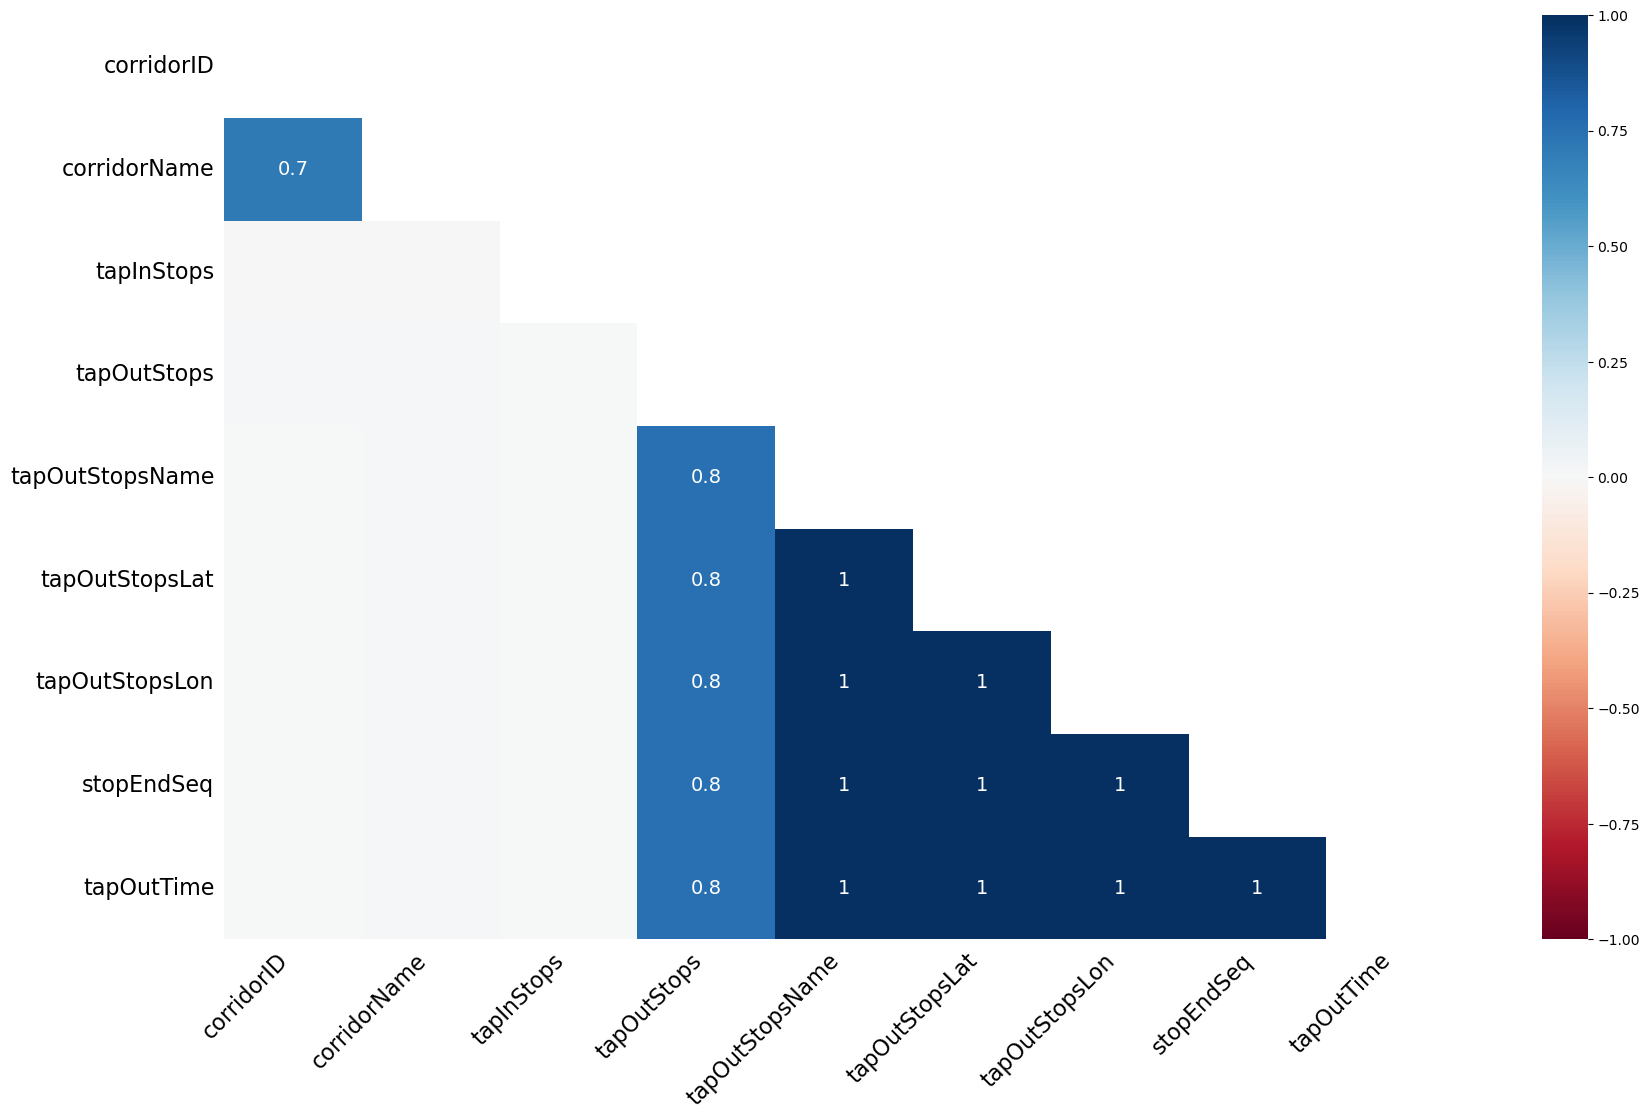

In [897]:
msno.heatmap(df_filtered)

<Axes: >

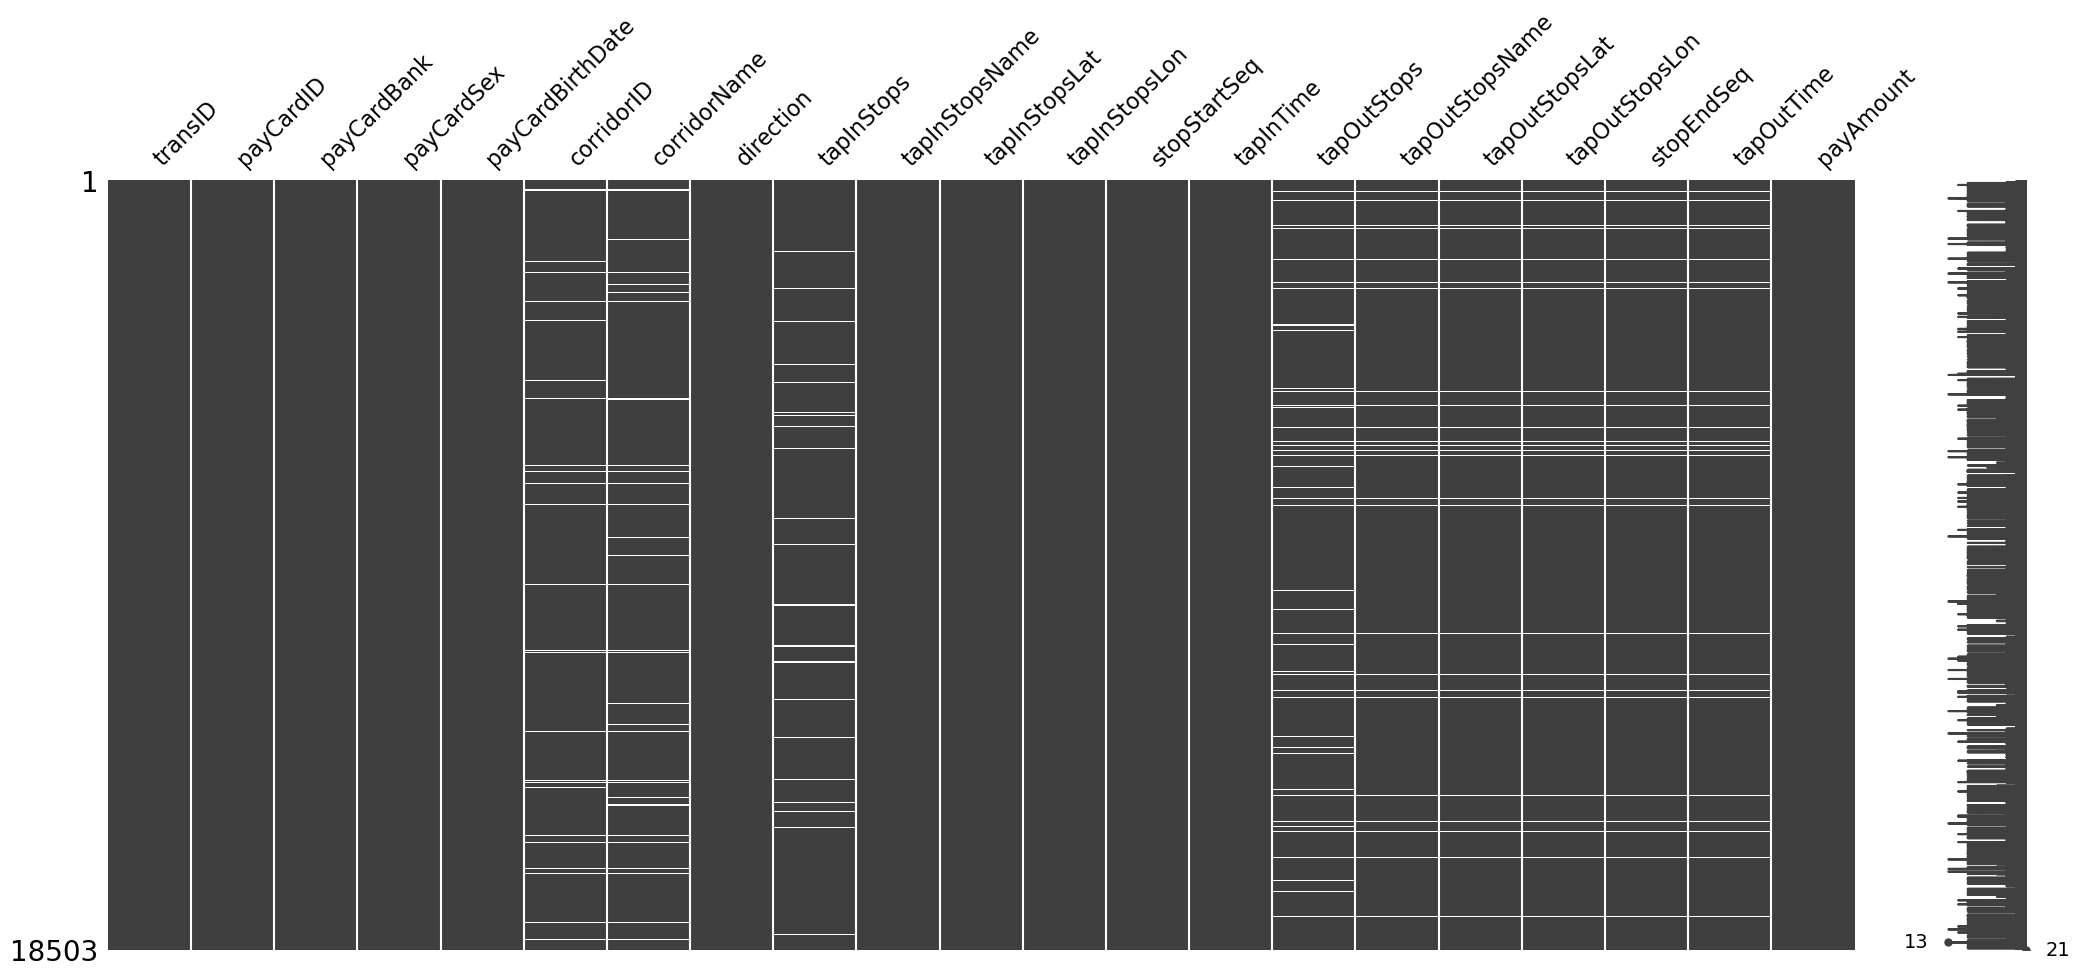

In [898]:
msno.matrix(df_filtered)

From the heatmap above:  

- Missing values in **`corridorID`** and **`corridorName`** show a relatively high positive correlation.  
  This means that when there are more missing values in `corridorID`, there are also more in `corridorName`, and vice versa.  
  This relationship can also be observed in the missing values matrix, where many white lines appear across both variables simultaneously.  

- Missing values in **`tapOutStops`** are also highly correlated with missing values in the following columns:  
  `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, and `tapOutTime`.  

- A correlation of **1** is observed between missing values in `tapOutStopsName` and those in `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, and `tapOutTime`.  
  This indicates that if `tapOutStopsName` is missing, then `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, and `tapOutTime` will also be missing.  
  This is clearly visible in the missing values matrix, where continuous white lines extend from `tapOutStopsName` through to `tapOutTime`.  


### Filling Missing Values Using Information from Related Columns

#### Imputing Missing Values in `corridorID` and `corridorName`

Based on the column descriptions, we know that **`corridorID`** is the identifier corresponding to **`corridorName`**.  
Therefore, we can impute the missing values in `corridorName` using information from `corridorID`, and vice versa.

In [900]:
# Fill corridorName based on corridorID
df_filtered['corridorName'] = df_filtered.groupby('corridorID')['corridorName'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

# Fill corridorID based on corridorName
df_filtered['corridorID'] = df_filtered.groupby('corridorName')['corridorID'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

<Axes: >

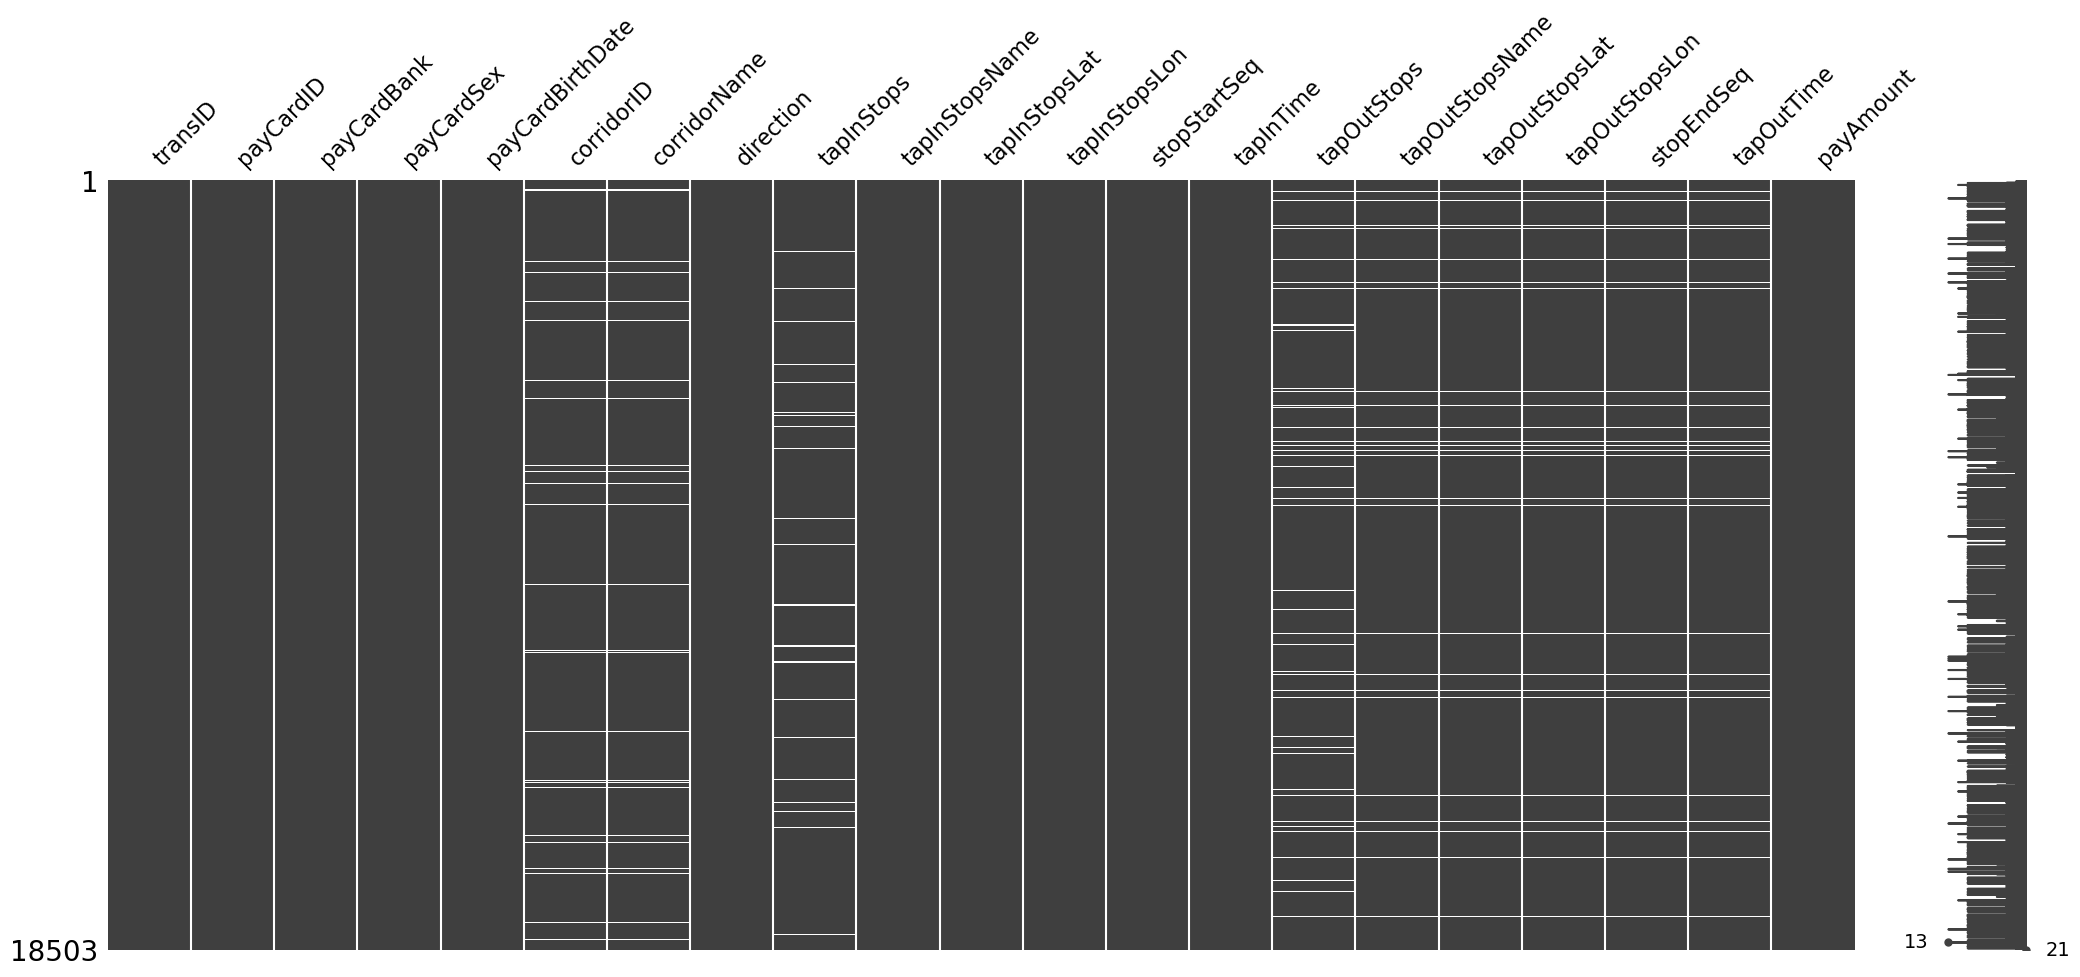

In [901]:
msno.matrix(df_filtered)

#### Imputing Missing Values in `tapInStops`

Based on the column descriptions, we know that **`tapInStops`** is the identifier corresponding to **`tapInStopsName`**.  
Therefore, we can impute the missing values in `tapInStops` using information from `tapInStopsName`.

In [902]:
# Fill tapInStops based on tapInStopsName
df_filtered['tapInStops'] = df_filtered.groupby('tapInStopsName')['tapInStops'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

<Axes: >

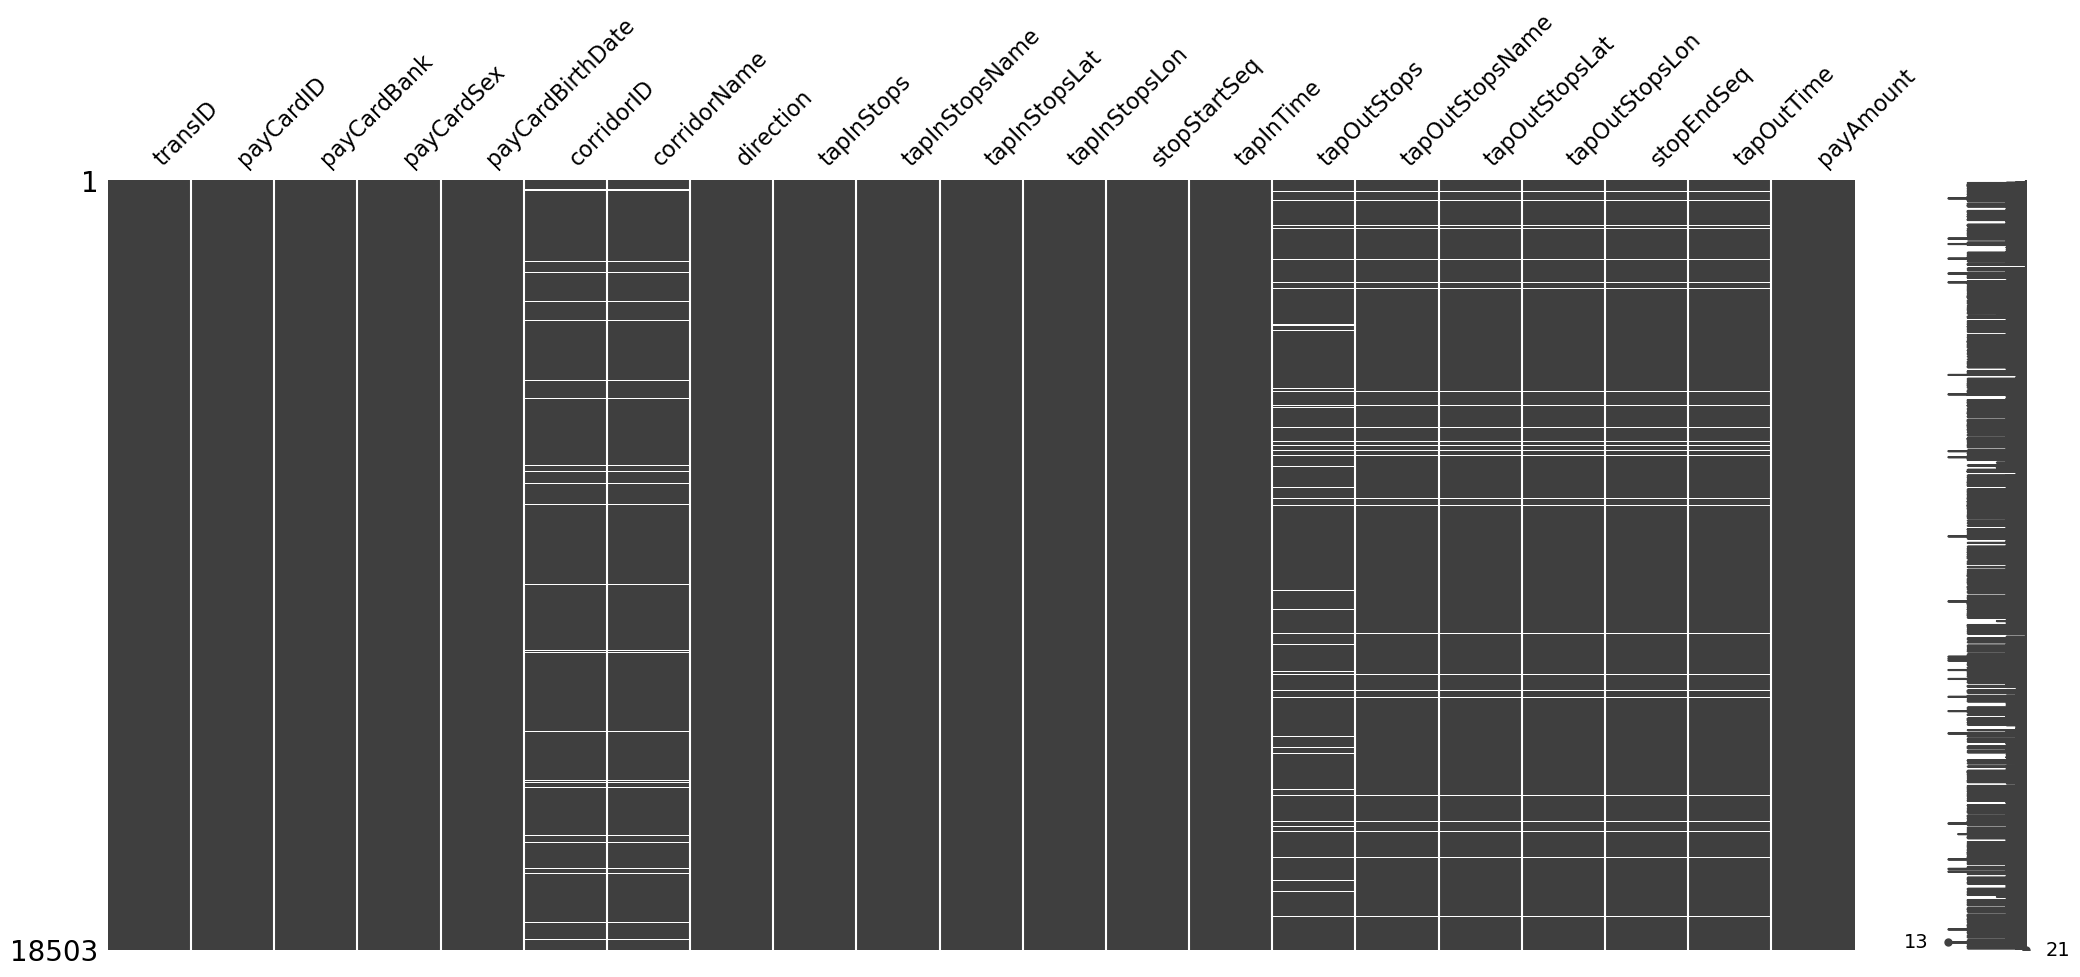

In [903]:
msno.matrix(df_filtered)

#### Imputing Missing Values in `tapOutStops`

Based on the column descriptions, we know that **`tapOutStops`** is the identifier corresponding to **`tapOutStopsName`**.  
Therefore, we can impute the missing values in `tapOutStops` using information from `tapOutStopsName`.

In [904]:
# Fill tapOutStops based on tapOutStopsName
df_filtered['tapOutStops'] = df_filtered.groupby('tapOutStopsName')['tapOutStops'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

<Axes: >

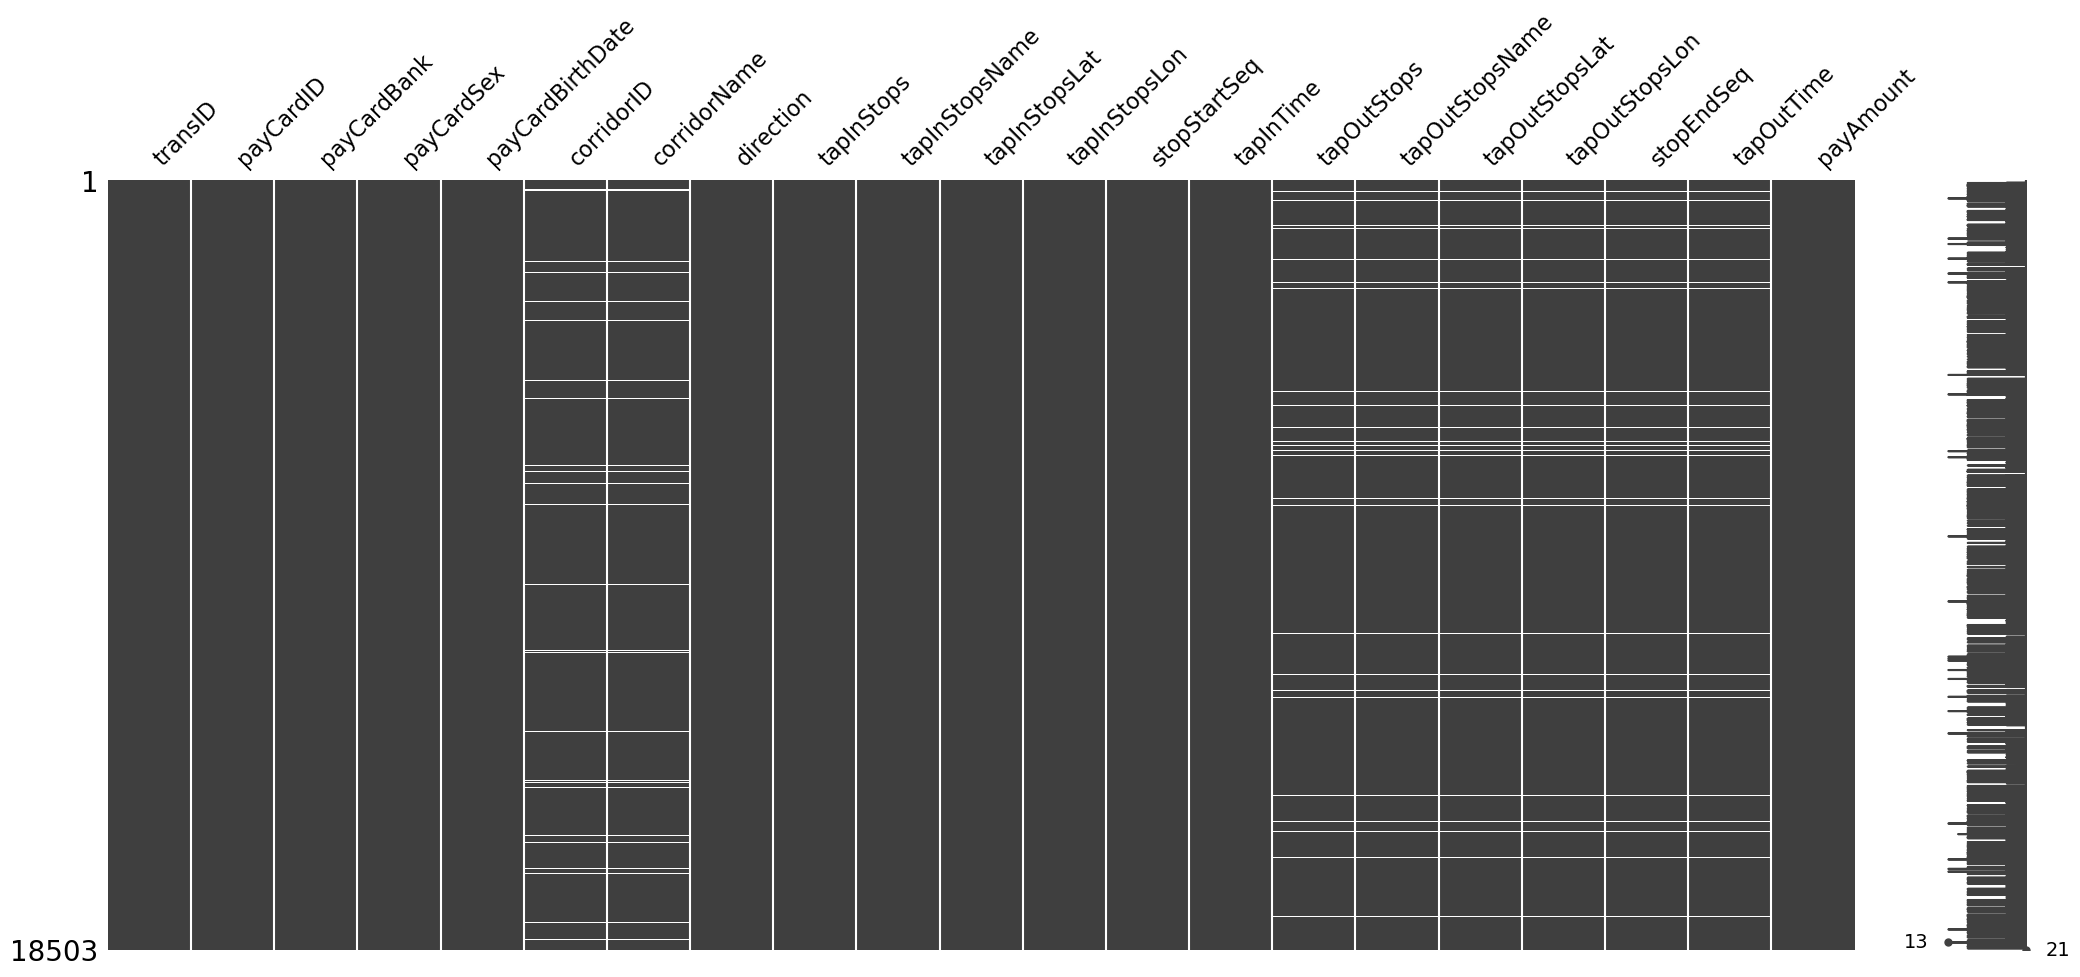

In [905]:
msno.matrix(df_filtered)

### Checking If Further Imputation is Possible

In [906]:
# For columns `corridorID` and `corridorName`
df_filtered.groupby(['tapInStopsName','tapOutStopsName'])['corridorID'].unique().reset_index().sample(20,random_state=2025)

,tapInStopsName,tapOutStopsName,corridorID
1896,Taman Mataram,MH Thamrin 2,"[1P, nan]"
1245,Penjaringan,Rusun Penjaringan,"[12H, nan]"
1424,RS Harapan Kita Arah Selatan,Senayan JCC Arah Timur,[3F]
843,Kemayoran Landas Pacu Timur,Danau Agung,"[JIS3, 12]"
993,Masjid Jami Al Barkah 2,Cipinang Indah,"[11Q, nan]"
326,Danau Agung 1,Honda Letjen Suprapto,"[14, nan]"
1456,RSIA Duren Tiga 2,Sbr. Term. Kampung Rambutan,[7B]
1154,Pasar Baru Timur,Pademangan,"[10H, 5]"
1734,Setiabudi Utara,Pejaten,[6A]
1139,Pancoran Tugu Arah Timur,Cikoko Stasiun Cawang Arah Timur,[9]


It appears that we cannot impute `corridorID` and `corridorName` using `tapInStops` and `tapOutStops`.  
For example, a passenger who taps in at **Kemayoran Landas Pacu Timur** and taps out at **Danau Agung** does not necessarily take the bus from corridor **JIS3**, but could also be using corridor **12**.  

Therefore, it would be invalid to use `tapInStops` and `tapOutStops` as imputations for `corridorID` and `corridorName`.


It also appears that we cannot perform further imputations for columns such as  `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, and `stopEndSeq`, since there are no related columns from which we can retrieve the missing information. Unless we have the **number of stops passed**, in which case we could calculate `stopEndSeq` based on `stopStartSeq` and number of stops passed.


### Dropping Missing Values

In [907]:
total_rows = len(df_filtered)
rows_with_missing = df_filtered.isna().any(axis=1).sum()

perc_rows_with_missing = round(100 * rows_with_missing / total_rows, 2)

print(f"Total rows       : {total_rows}")
print(f"Rows with NaN    : {rows_with_missing}")
print(f"Percentage rows with NaN: {perc_rows_with_missing}%")


Total rows       : 18503
Rows with NaN    : 1271
Percentage rows with NaN: 6.87%


Even though the percentage of the remaining missing values is slightly above 5% (6.87%),  
it should still be acceptable to drop the rows containing missing values since not much information would be lost from the overall dataset.


In [908]:
df_filtered = df_filtered.dropna()
df_filtered.shape

(17232, 21)

### Checking Data Types

In [909]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17232 entries, 0 to 37899
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           17232 non-null  object        
 1   payCardID         17232 non-null  int64         
 2   payCardBank       17232 non-null  object        
 3   payCardSex        17232 non-null  object        
 4   payCardBirthDate  17232 non-null  int64         
 5   corridorID        17232 non-null  object        
 6   corridorName      17232 non-null  object        
 7   direction         17232 non-null  float64       
 8   tapInStops        17232 non-null  object        
 9   tapInStopsName    17232 non-null  object        
 10  tapInStopsLat     17232 non-null  float64       
 11  tapInStopsLon     17232 non-null  float64       
 12  stopStartSeq      17232 non-null  int64         
 13  tapInTime         17232 non-null  datetime64[ns]
 14  tapOutStops       17232 non

It appears that some columns still have incorrect data types:

- `payCardID` should be stored as an **object** (string). Even though the values are numeric, we should not perform arithmetic operations on this variable.  
- `stopEndSeq` should have the same data type as `stopStartSeq`, since both refer to the sequence of bus stops for tap-in and tap-out within a specific corridor.


In [910]:
df_filtered['payCardID'] = df_filtered['payCardID'].astype('object')
df_filtered['stopEndSeq'] = df_filtered['stopEndSeq'].astype('int')

In [911]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17232 entries, 0 to 37899
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           17232 non-null  object        
 1   payCardID         17232 non-null  object        
 2   payCardBank       17232 non-null  object        
 3   payCardSex        17232 non-null  object        
 4   payCardBirthDate  17232 non-null  int64         
 5   corridorID        17232 non-null  object        
 6   corridorName      17232 non-null  object        
 7   direction         17232 non-null  float64       
 8   tapInStops        17232 non-null  object        
 9   tapInStopsName    17232 non-null  object        
 10  tapInStopsLat     17232 non-null  float64       
 11  tapInStopsLon     17232 non-null  float64       
 12  stopStartSeq      17232 non-null  int64         
 13  tapInTime         17232 non-null  datetime64[ns]
 14  tapOutStops       17232 non

# D. Exploratory Data Analysis

## Information We Can Extract from the Existing Columns

From the existing columns, we can derive new features to enhance and support our analysis, such as:  

- **Day name** of the tap-in (`tapInTime`)  
- **Age** (calculated from `payCardBirthDate`)  
- **Age category**  
- **Trip Duration**
- **Number of stops passed**  
- **Approximate distance from tap-in stops to tap-out stops**




### Creating Name of Day Passengers Tap In

The `datetime` object has a method called **`strftime()`** that allows formatting date objects into readable strings.  

The method takes one parameter, **`format`**, which specifies the format of the returned string.  

For example:  `'%a'` retrieves the short version of the weekday (e.g., *Mon, Tue, Wed*).    
[Source](https://www.w3schools.com/python/python_datetime.asp)

Therefore, we can retrieve the short version of the weekday from `tapInTime`.


In [912]:
df_filtered['dayofWeek'] = df_filtered['tapInTime'].dt.strftime('%a')

df_filtered[['tapInTime', 'dayofWeek']].sample(10)


,tapInTime,dayofWeek
12234,2023-04-03 07:56:11,Mon
7592,2023-04-19 16:48:24,Wed
29213,2023-04-26 08:55:41,Wed
35031,2023-04-13 15:49:17,Thu
36894,2023-04-18 08:48:21,Tue
18737,2023-04-11 20:17:59,Tue
25699,2023-04-20 18:21:56,Thu
11687,2023-04-28 05:38:44,Fri
11209,2023-04-27 16:46:39,Thu
7282,2023-04-19 06:43:25,Wed


Using this information, we can visualize the number of tap-in and tap-out events for each day.

In [913]:
countsbyDay = df_filtered.groupby('dayofWeek')['transID'].count().reset_index().rename(columns={'transID':'passengersCount'})
countsbyDay

,dayofWeek,passengersCount
0,Fri,3153
1,Mon,3111
2,Sat,838
3,Sun,812
4,Thu,3098
5,Tue,3116
6,Wed,3104


In [914]:
fig = px.bar(
    countsbyDay,
    x='dayofWeek',
    y='passengersCount',
    category_orders={'dayofWeek': ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']}, 
                     title='Counts of Trnasjakarta Passengers per Day in April 2023'
)

fig.update_layout(
    xaxis_title="Day",
    yaxis_title="Count of Passengers"
)

fig.show()

From the bar plot, it can be observed that the number of tap-in and tap-out events is considerably lower on weekends (Saturday and Sunday). As this analysis focuses on identifying corridors with higher passenger density, the dataset (`df_filtered`) is further restricted to include only weekdays.

In [915]:
df_filtered=df_filtered[(df_filtered['dayofWeek']!='Sat') & (df_filtered['dayofWeek']!='Sun')]

### Calculating Passenger's Age

In [916]:
df_filtered['tapInTime'].describe()[['min','max']]

min    2023-04-03 05:00:14
max    2023-04-28 21:58:29
Name: tapInTime, dtype: object

Since the dataset is from April 2023, the age of passengers can be calculated using the formula:  

$$
\text{age} = 2023 - \text{payCardBirthDate}
$$


In [917]:
df_filtered['age'] = 2023 - df_filtered['payCardBirthDate']

df_filtered[['payCardBirthDate', 'age']].head()

,payCardBirthDate,age
0,2008,15
1,1997,26
2,1992,31
3,1978,45
4,1982,41


### Creating Categories of Age

Age can be categorized using the following reference table:

<div align="center">

<table>
<tr>
  <th>Age Group</th>
  <th>Age Range</th>
</tr>
<tr>
  <td>Child</td>
  <td>0–16</td>
</tr>
<tr>
  <td>Young Adults</td>
  <td>17–30</td>
</tr>
<tr>
  <td>Middle-aged Adults</td>
  <td>31–45</td>
</tr>
<tr>
  <td>Old-aged Adults</td>
  <td>Above 45</td>
</tr>
</table>

</div>

<p align="center">
  <sub>Source: https://www.semanticscholar.org/paper/Human-Age-Group-Classification-Using-Facial-Bhat-V.K.Patil/19ddb412336ce633c1fe21544605c7bd65ff8d66</sub>
</p>


In [918]:
def categorize_age(age):
    if age <= 16:
        return "Child"
    elif 17 <= age <= 30:
        return "Young Adults"
    elif 31 <= age <= 45:
        return "Middle-aged Adults"
    else:
        return "Old-aged Adults"

df_filtered['age_group'] = df_filtered['age'].apply(categorize_age)

df_filtered[['age', 'age_group']].head(10)


,age,age_group
0,15,Child
1,26,Young Adults
2,31,Middle-aged Adults
3,45,Middle-aged Adults
4,41,Middle-aged Adults
9,19,Young Adults
10,26,Young Adults
12,35,Middle-aged Adults
13,21,Young Adults
15,12,Child


### Calculating the Trip Duration

We approximate the trip duration as the difference between `tapOutTime` and `tapInTime`:

$$
\text{duration} = \text{tapOutTime} - \text{tapInTime}
$$

It should be noted that this value does not represent the actual travel time, but rather the interval between when the passenger taps in and taps out.


In [919]:
df_filtered['duration'] = df_filtered['tapOutTime'] - df_filtered['tapInTime']
df_filtered['duration_min'] = df_filtered['duration'].dt.total_seconds() / 60

df_filtered[['tapInTime', 'tapOutTime', 'duration','duration_min']].head(10)

,tapInTime,tapOutTime,duration,duration_min
0,2023-04-03 05:21:44,2023-04-03 06:00:53,0 days 00:39:09,39.150000
1,2023-04-03 05:42:44,2023-04-03 06:40:01,0 days 00:57:17,57.283333
2,2023-04-03 05:59:06,2023-04-03 06:50:55,0 days 00:51:49,51.816667
3,2023-04-03 05:44:51,2023-04-03 06:28:16,0 days 00:43:25,43.416667
4,2023-04-03 06:17:35,2023-04-03 06:57:03,0 days 00:39:28,39.466667
9,2023-04-03 05:57:47,2023-04-03 06:51:12,0 days 00:53:25,53.416667
10,2023-04-03 06:32:28,2023-04-03 07:23:54,0 days 00:51:26,51.433333
12,2023-04-03 06:15:04,2023-04-03 07:08:31,0 days 00:53:27,53.450000
13,2023-04-03 06:12:14,2023-04-03 07:07:35,0 days 00:55:21,55.350000
15,2023-04-03 06:43:20,2023-04-03 07:07:17,0 days 00:23:57,23.950000


### Calculating the Number of Stops Passed by Passengers


The number of stops passed by a passenger can be calculated using the following formula:

$$
\text{stopsCount} = \text{stopEndSeq} - \text{stopStartSeq}
$$

In [920]:
df_filtered['stopsCount'] = df_filtered['stopEndSeq'] - df_filtered['stopStartSeq'] - 1

df_filtered[['stopStartSeq', 'stopEndSeq', 'stopsCount']].head(10)

,stopStartSeq,stopEndSeq,stopsCount
0,7,12,4
1,13,21,7
2,38,39,0
3,23,29,5
4,5,15,9
9,15,24,8
10,17,23,5
12,4,6,1
13,2,4,1
15,1,3,1


### Calculating the Distance between Tap-in Stops and Tap-out Stops


From the dataset, both tap-in and tap-out stops are provided with their respective latitude and longitude coordinates. Using this geographical information, the travel distance between the two stops can be computed by applying the `geodesic()` function from the GeoPy library, which calculates the length of the shortest path between 2 points on any surface.

In [921]:
from geopy.distance import geodesic

df_filtered['distance_km'] = df_filtered.apply(
    lambda row: geodesic(
        (row['tapInStopsLat'], row['tapInStopsLon']), 
        (row['tapOutStopsLat'], row['tapOutStopsLon'])
    ).kilometers,
    axis=1
)
df_filtered[['distance_km']].head()

,distance_km
0,2.506718
1,2.016381
2,0.079676
3,1.449053
4,8.730128


### Check for Outliers and Perform Normality Tests for Numerical Variables

The normality test is conducted to determine whether the numerical variables in our dataset follow a normal distribution.  
This step is necessary to decide the appropriate measure of central tendency to use when drawing conclusions from the analysis.

The numerical variables being tested are:  
- `duration`  
- `age`  
- `stopsCount`  


#### `duration `

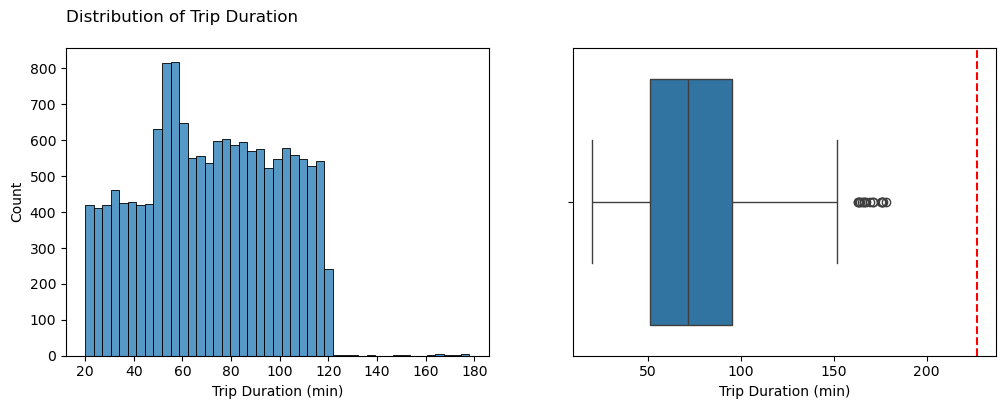

In [922]:
# extreme values line
extremeRight = df_filtered['duration_min'].quantile(0.75) + 3*(df_filtered['duration_min'].quantile(0.75)-df_filtered['duration_min'].quantile(0.25))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribution of Trip Duration\n',loc='left')
sns.histplot(data=df_filtered, x='duration_min')
plt.xlabel('Trip Duration (min)')
plt.subplot(1,2,2)
sns.boxplot(data=df_filtered, x='duration_min')
plt.xlabel('Trip Duration (min)')
plt.axvline(x=extremeRight, linestyle='--', color='red')
plt.show()

Based on the histogram and boxplot, the distribution of `duration` is positively skewed, with a noticeable right tail indicating that some trips last substantially longer than the majority. The boxplot also highlights the presence of several global outliers, though no extreme outliers are observed. These outliers, which fall roughly between 150 and 200 minutes, may still be considered reasonable given that they represent the tap-in to tap-out duration of passengers. Such long durations could plausibly result from exceptionally long waiting times (headways) combined with severe traffic congestion. However, it would be important to further investigate whether these outliers are concentrated in specific routes or occur randomly across different corridors.

Subsequently, a normality test is conducted for the variable `duration`.

1. Hypotheses  
$
H_0: \text{Duration follows a normal distribution}
$   
$
H_1: \text{Duration does not follow a normal distribution}
$

2. Significance Level ($\alpha$)  
$
\alpha = 0.05
$

3. Test Statistic  
Using the **Shapiro-Wilk Test**:  
$
W = 0.970, \quad p\text{-value} = 0.000
$


In [923]:
stat, p_value = shapiro(df_filtered['duration'])
print("Statistic =", stat, ", p-value =", p_value)

Statistic = 0.9688084700148567 , p-value = 4.1074790378375714e-49



4. Rejection Region for $H_0$  
Reject $H_0$ if $p\text{-value} < 0.05$  

5. Decision  
Since $p\text{-value} = 0.000 < 0.05$, we reject $H_0$.  

6. Conclusion  
At a 5% significance level, the variable `duration` **does not follow a normal distribution**.  

#### `age `

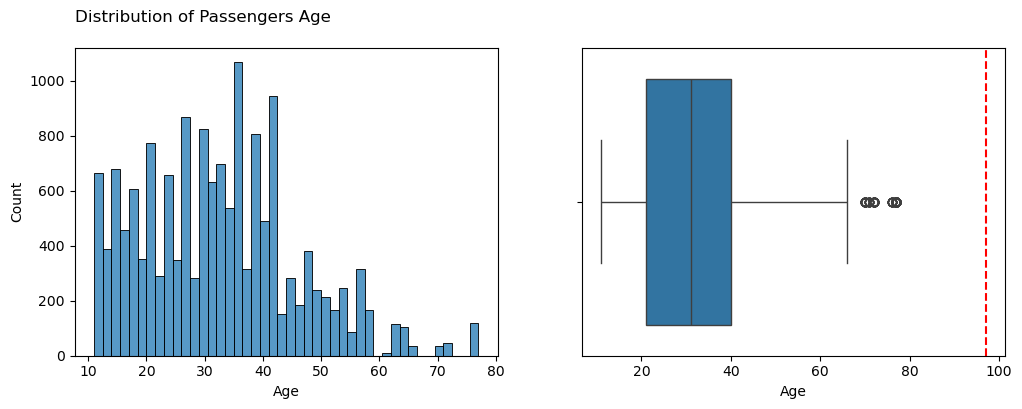

In [924]:
# extreme values line
extremeRight = df_filtered['age'].quantile(0.75) + 3*(df_filtered['age'].quantile(0.75)-df_filtered['age'].quantile(0.25))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribution of Passengers Age\n',loc='left')
sns.histplot(data=df_filtered, x='age')
plt.xlabel('Age')
plt.subplot(1,2,2)
sns.boxplot(data=df_filtered, x='age')
plt.xlabel('Age')
plt.axvline(x=extremeRight, linestyle='--', color='red')
plt.show()

Based on the histogram and boxplot, the distribution of `age` is positively skewed, with a right tail indicating that some passengers are considerably older than the majority. The boxplot reveals several global outliers, although no extreme outliers are detected. These outliers fall within the age range of approximately 70–80 years, which is entirely reasonable and expected in the context of passenger demographics. Therefore, these values should not be considered erroneous but rather a natural part of the dataset.

Subsequently, a normality test is performed for the variable `age`.

1. Hypotheses  
$
H_0: \text{Age follows a normal distribution}
$   
$
H_1: \text{Age does not follow a normal distribution}
$

2. Significance Level ($\alpha$)  
$
\alpha = 0.05
$

3. Test Statistic  
Using the **Shapiro-Wilk Test**:  
$
W = 0.967, \quad p\text{-value} = 0.000
$


In [925]:
stat, p_value = shapiro(df_filtered['age'])
print("Statistic =", stat, ", p-value =", p_value)

Statistic = 0.966958123185166 , p-value = 4.061807155306295e-50



4. Rejection Region for $H_0$  
Reject $H_0$ if $p\text{-value} < 0.05$  

5. Decision  
Since $p\text{-value} = 0.000 < 0.05$, we reject $H_0$.  

6. Conclusion  
At a 5% significance level, the variable `age` **does not follow a normal distribution**.  

#### `stopsCount `

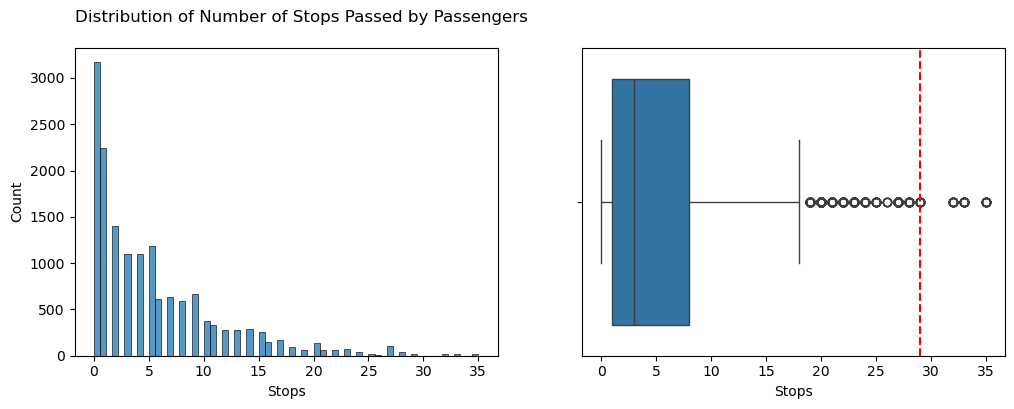

In [926]:
# extreme values line
extremeRight = df_filtered['stopsCount'].quantile(0.75) + 3*(df_filtered['stopsCount'].quantile(0.75)-df_filtered['stopsCount'].quantile(0.25))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribution of Number of Stops Passed by Passengers\n',loc='left')
sns.histplot(data=df_filtered, x='stopsCount')
plt.xlabel('Stops')
plt.subplot(1,2,2)
sns.boxplot(data=df_filtered, x='stopsCount')
plt.xlabel('Stops')
plt.axvline(x=extremeRight, linestyle='--', color='red')
plt.show()

Based on the histogram and boxplot, the distribution of `stopsCount` is positively skewed, with a right tail indicating that some passengers pass through a substantially higher number of stops in a single trip. The boxplot highlights the presence of both global outliers (ranging between 18–30 stops) and extreme outliers (above 30 stops). However, these values remain plausible since certain corridors indeed have a large number of stops. The next step is to identify which corridors contain these extreme outlier values so that we can cross-check whether the actual number of stops in those corridors justifies such high counts.

In [927]:
df_filtered[df_filtered['stopsCount']>extremeRight]['corridorID'].unique()

array(['9D', '5N'], dtype=object)

It turns out that corridors **9D** and **5N** have 50 and 66 stops, respectively.  
Thus, these outliers are still valid and should not be considered anomalies, since trips with 30–35 stops remain within the expected range for these corridors.

Subsequently, a normality test is performed for the variable `stopsCount`.

1. Hypotheses  
$
H_0: \text{The stopsCount follows a normal distribution}
$   
$
H_1: \text{The stopsCount does not follow a normal distribution}
$

2. Significance Level ($\alpha$)  
$
\alpha = 0.05
$

3. Test Statistic  
Using the **Shapiro-Wilk Test**:  
$
W = 0.815, \quad p\text{-value} = 0.000
$


In [928]:
stat, p_value = shapiro(df_filtered['stopsCount'])
print("Statistic =", stat, ", p-value =", p_value)

Statistic = 0.8147655652922571 , p-value = 4.7896809228257365e-85



4. Rejection Region for $H_0$  
Reject $H_0$ if $p\text{-value} < 0.05$  

5. Decision  
Since $p\text{-value} = 0.000 < 0.05$, we reject $H_0$.  

6. Conclusion  
At a 5% significance level, the variable `stopsCount` **does not follow a normal distribution**.  

#### Conclusions
From the normality tests conducted for `duration`, `age`, and `stopsCount`, it can be concluded that none of these variables follow a normal distribution. This conclusion is supported by both the histogram and boxplot visualizations, as well as the results of the Shapiro–Wilk test.

## EDA: Passenger Demographics

### Passengers Proportion by Gender

In [929]:
countsbyGender = df_filtered.groupby('payCardSex')['transID'].count().reset_index().rename(columns={'transID':'passengersCount','payCardSex':'Gender'})
countsbyGender

,Gender,passengersCount
0,F,8095
1,M,7487


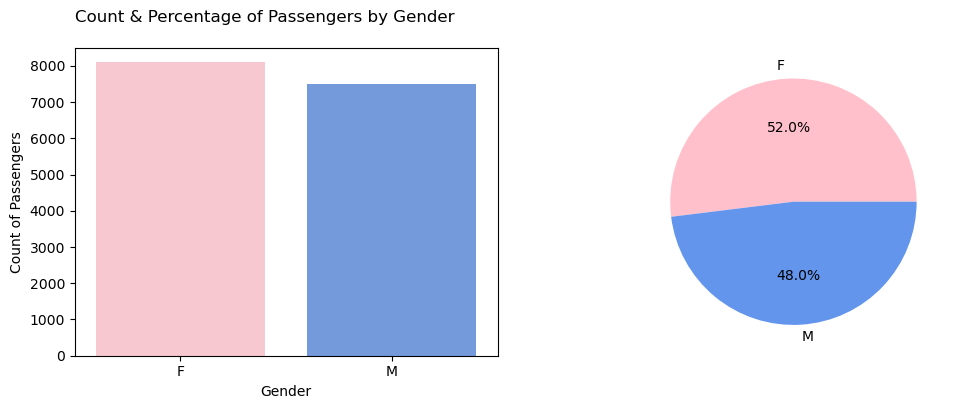

In [930]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(data=countsbyGender, x='Gender',y='passengersCount',palette={'M': 'cornflowerblue', 'F': 'pink'})
plt.xlabel('Gender')
plt.ylabel('Count of Passengers')
plt.title('Count & Percentage of Passengers by Gender\n', loc='left')
plt.subplot(1,2,2)
plt.pie(data=countsbyGender, x='passengersCount',labels='Gender',autopct='%.1f%%',
        explode=[0,0],colors=['pink','cornflowerblue'])
plt.show()

During the month, female passengers outnumbered male passengers. The number of female passengers exceeded 8,000, accounting for approximately 52% of the total, while male passengers amounted to nearly 7,500 or about 48%. This indicates a slightly higher utilization of Transjakarta services (BRT and feeder) by women compared to men.


### Age Distribution by Gender

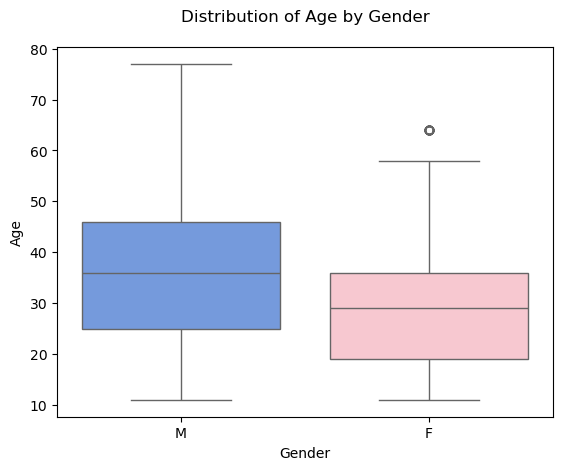

In [931]:
sns.boxplot(data=df_filtered,y='age',x='payCardSex',palette={'M':'cornflowerblue','F':'Pink'})
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Distribution of Age by Gender\n')
plt.show()

From the boxplot, it can be observed that male passengers tend to be older compared to female passengers. The median age of males is higher, and their age distribution extends up to the late 70s. For female passengers, individuals in their 60s are already considered outliers, whereas among males, passengers in their 70s are still within the observed range. This suggests that older individuals are more represented in the male passenger group compared to females.  

To formally assess this difference, a Mann–Whitney U test can be conducted, as the normality test indicates that the age variable is not normally distributed. The result of this test would provide statistical evidence on whether the observed age difference between male and female passengers is significant.

1. Hypotheses  
$
H_0: \text{The age of males is less than or equal to that of females.}
$   
$
H_1: \text{The age of males is higher than that of females.}
$

2. Significance Level ($\alpha$)  
$
\alpha = 0.05
$

3. Test Statistic  
Using the **Mann–Whitney U Test**:  
$
U = 40187003.0, \quad p\text{-value} = 0.000
$ 

In [932]:
from scipy.stats import mannwhitneyu

# Mann–Whitney U test
result_mannU = list(mannwhitneyu(
    df_filtered[df_filtered['payCardSex']=='M']['age'], 
    df_filtered[df_filtered['payCardSex']=='F']['age'],
      alternative='greater'))

print('U-Statistic:', result_mannU[0])
print('P-value:', result_mannU[1])


U-Statistic: 40187003.0
P-value: 2.3416123206964078e-272



4. Rejection Region for $H_0$  
Reject $H_0$ if $p\text{-value} < 0.05$  

5. Decision  
Since $p\text{-value} = 0.000 < 0.05$, we reject $H_0$.  

6. Conclusion  
At the 5% significance level, there is sufficient evidence to conclude that **the age of male passengers is higher than that of female passengers**.

### Passengers Count by Age Group

In [933]:
countsbyAgeGroup = df_filtered.groupby(['age_group'])['transID']\
    .count().reset_index().rename(columns={'transID':'passengersCount'})
countsbyAgeGroup

,age_group,passengersCount
0,Child,2189
1,Middle-aged Adults,5926
2,Old-aged Adults,2464
3,Young Adults,5003


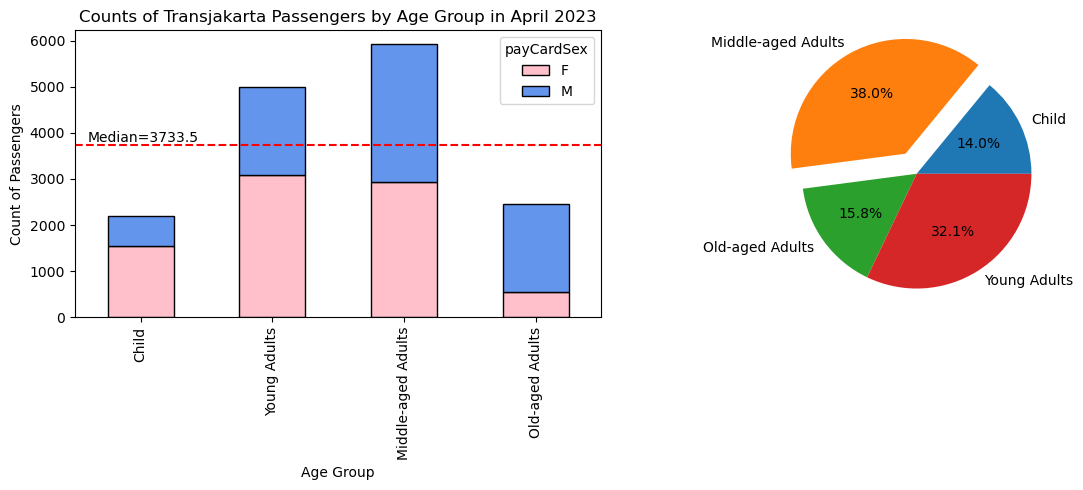

In [1027]:
order = ["Child", "Young Adults", "Middle-aged Adults", "Old-aged Adults"]

# pivot supaya mudah stacking
pivot_data = df_filtered.pivot_table(index="age_group", columns="payCardSex", 
                                     values="transID", aggfunc="count").reindex(order)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

pivot_data.plot(
    kind="bar",
    stacked=True,
    color={"F": "pink", "M": "cornflowerblue"},
    edgecolor="black",
    ax=axes[0]
)

axes[0].set_title("Counts of Transjakarta Passengers by Age Group in April 2023")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Count of Passengers")
axes[0].axhline(
    y=countsbyAgeGroup['passengersCount'].median(),
    linestyle='--',
    color='red'
)
axes[0].text(
    x=-0.4,
    y=3800,
    s=f"Median={countsbyAgeGroup['passengersCount'].median()}"
)

# Pie chart
axes[1].pie(
    countsbyAgeGroup['passengersCount'],
    labels=countsbyAgeGroup['age_group'],
    autopct="%.1f%%",
    explode=[0, 0.2, 0, 0]
)

plt.tight_layout()
plt.show()


It can be seen from the bar plot that the age groups **Young Adults** and **Middle-aged Adults** are considerably higher than the median, with **Middle-aged Adults** being the largest group at nearly 6,000 passengers in April 2023. In contrast, the **Children** group has the lowest number of passengers. These findings suggest that Young Adults and Middle-aged Adults are most likely office workers who rely on Transjakarta as their primary mode of transportation for commuting to and from work.

## EDA: Trips

### Corridors with the Highest Transactions and Stops with the Most Tap-ins/Tap-outs

In [1034]:
df_filtered.groupby(['corridorID','corridorName'])['transID'].count().reset_index().rename(columns={'transID':'passengersCount'}).sort_values('passengersCount',ascending=False).head()

,corridorID,corridorName,passengersCount
104,S21,Ciputat - CSW,352
87,JIS3,Harmoni - Jakarta International Stadium,311
71,8C,Kebayoran Lama - Tanah Abang,307
7,11Q,Kampung Melayu - Pulo Gebang via BKT,273
79,9D,Pasar Minggu - Tanah Abang,272


In [1032]:
df_filtered.groupby(['corridorID','tapInStopsName'])['transID'].count().reset_index().rename(columns={'transID':'passengersCount'}).sort_values('passengersCount',ascending=False).head()

,corridorID,tapInStopsName,passengersCount
686,9N,Garuda Taman Mini,154
728,JIS3,Simpang Danau Sunter Utara Barat,82
531,7C,Cibubur Junction,78
767,M13,Seskoal,76
96,12H,Rusun Penjaringan,63


In [1035]:
df_filtered.groupby(['corridorID','tapOutStopsName'])['transID'].count().reset_index().rename(columns={'transID':'passengersCount'}).sort_values('passengersCount',ascending=False).head()

,corridorID,tapOutStopsName,passengersCount
642,9N,BKN,114
676,JIS3,Jembatan Item,95
644,9N,Pinang Ranti,95
500,7C,Cibubur Junction,81
499,7C,BKN,78


In April 2023, the **Ciputat–CSW (S21)** corridor was the busiest, carrying the highest number of passengers. It was followed by the **JIS3 (Harmoni – JIS)** corridor and the **8C (Kebayoran Lama – Tanah Abang)** corridor.  

Regarding stops, the analysis reveals that:  

- **Tap-ins** were most frequent at **Garuda Taman Mini (Corridor 9N)** with 154 passengers,  
  followed by **Simpang Danau Sunter Utara Barat (JIS3)** with 82 passengers,  
  **Cibubur Junction (7C)** with 78 passengers,  
  **Seskoal (M13)** with 76 passengers,  
  and **Rusun Penjaringan (12H)** with 63 passengers.  

- **Tap-outs** were most frequent at **BKN (Corridor 9N)** with 114 passengers,  
  followed by **Jembatan Item (JIS3)** with 95 passengers,  
  **Pinang Ranti (9N)** with 95 passengers,  
  **Cibubur Junction (7C)** with 81 passengers,  
  and **BKN (7C)** with 78 passengers.  

These results highlight that certain stops, such as **BKN** and **Cibubur Junction**, serve as major hubs for both entry and exit, underlining their importance in passenger flows within the Transjakarta network.


### Bank Card Preference among Transjakarta Passengers

In [1019]:
countsbyCard = df_filtered.groupby('payCardBank')['transID'].count().reset_index()\
    .rename(columns={'transID':'passengersCount'}).sort_values('passengersCount',ascending=False)
countsbyCard
countsbyCard["Percentage"] = countsbyCard["passengersCount"] / countsbyCard["passengersCount"].sum() * 100
countsbyCard["Cumulative"] = countsbyCard["Percentage"].cumsum()
countsbyCard

,payCardBank,passengersCount,Percentage,Cumulative
2,dki,7412,47.567706,47.567706
3,emoney,2973,19.079707,66.647414
4,flazz,1566,10.050058,76.697471
1,brizzi,1464,9.395456,86.092928
0,bni,1145,7.348222,93.441150
5,online,1022,6.558850,100.000000


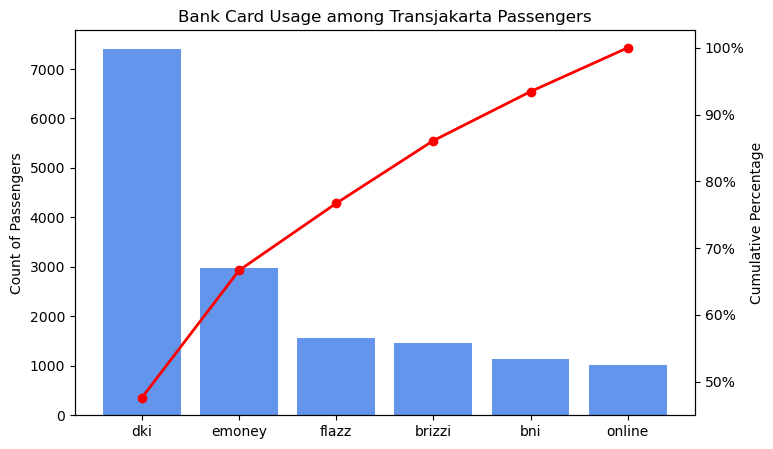

In [1023]:
fig, ax1 = plt.subplots(figsize=(8,5))

# Bar chart
ax1.bar(countsbyCard["payCardBank"], countsbyCard["passengersCount"], color="cornflowerblue")
ax1.set_ylabel("Count of Passengers")

# Cumsum
ax2 = ax1.twinx()
ax2.plot(countsbyCard["payCardBank"], countsbyCard["Cumulative"], color="red", marker="o", linewidth=2)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0f}%"))
ax2.set_ylabel("Cumulative Percentage")

plt.title("Bank Card Usage among Transjakarta Passengers")
plt.show()

#### **Interpretation of Pareto Chart: Bank Card Usage among Transjakarta Passengers**

- **Bank DKI cards are the most widely used**  
  - Approximately **47.6%** of all passengers use Bank DKI cards, representing almost half of the total.  
  - This shows that Bank DKI dominates card usage among Transjakarta passengers.  

- **E-money (Mandiri) ranks second**  
  - With **19.1%**, when combined with Bank DKI cards, the cumulative share reaches **66.6%**.  
  - This means the top two card types (Bank DKI and e-money) already account for more than **two-thirds (2/3) of all passengers**.  

- **Flazz (BCA), Brizzi (BRI), BNI TapCash, and online payments contribute much less**: Each accounts for only around **6–10%** of total usage.  



### Number of Trip (Tap-in & Tap-out Events) per Hour

In [935]:
df_filtered['hour'] = df_filtered['tapInTime'].dt.hour

In [936]:
countsbyHour = df_filtered.groupby(['hour'])['transID'].count().reset_index().rename(columns={'transID':'passengersCount'})
countsbyHour

,hour,passengersCount
0,5,1569
1,6,2585
2,7,1113
3,8,1137
4,9,1158
5,10,56
6,11,63
7,12,48
8,13,63
9,14,2


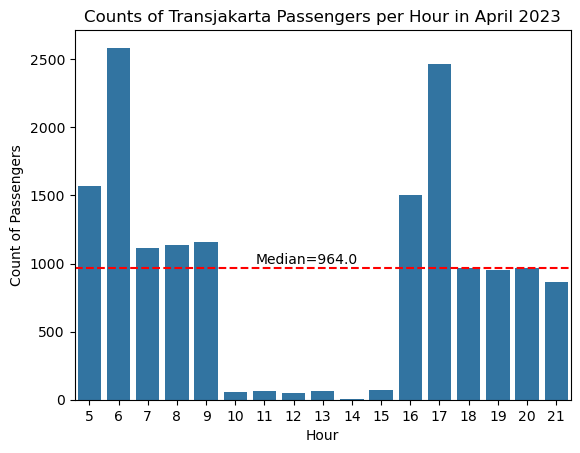

In [937]:
sns.barplot(data=countsbyHour, x='hour',y='passengersCount', ci=None)
plt.title('Counts of Transjakarta Passengers per Hour in April 2023')
plt.xlabel('Hour')
plt.ylabel('Count of Passengers')
plt.axhline(y=countsbyHour['passengersCount'].median(),linestyle='--',color='red')
plt.text(x=5.7, y=1000, s=f'Median={countsbyHour['passengersCount'].median()}')
plt.show()

From the barplot above, it can be observed that the number of passengers between 05.00 and 09.59 is considerably higher than the overall median, with a notable peak occurring between 06.00 and 06.59, where the number of passengers exceeds 2,500. This pattern indicates that the time interval 05.00–09.59 represents the morning rush hours.

Similarly, in the afternoon, passenger counts between 16.00 and 17.59 are significantly above the median, with the highest peak recorded between 17.00 and 17.59. Furthermore, the period between 18.00 and 21.59 shows passenger counts that are close to the median, suggesting sustained but moderate demand.

Based on these findings, we identify the peak or rush hours for Transjakarta BRT and feeder services as occurring during 05.00–09.59 (morning rush hours) and 16.00–21.59 (evening rush hours).

Therefore, we can extract the hour from `tapInTime` using `.dt.hour` and categorize them as:  

- **Rush Hour**: 05:00–09.59 or 16.00-21.59 
- **Regular Hour**: all other hours  


In [938]:
def categorize_hour(hour):
    if (5 <= hour <10) or (16 <= hour <22) :
        return "Rush Hour"
    else:
        return "Regular Hour"

df_filtered['rush_hour'] = df_filtered['hour'].apply(categorize_hour)

df_filtered[['tapInTime', 'hour','rush_hour']].sample(15, random_state=2)


,tapInTime,hour,rush_hour
19962,2023-04-12 21:35:55,21,Rush Hour
34975,2023-04-13 05:39:26,5,Rush Hour
31454,2023-04-28 09:11:37,9,Rush Hour
37123,2023-04-18 15:22:38,15,Regular Hour
25290,2023-04-20 08:31:33,8,Rush Hour
30341,2023-04-27 08:02:25,8,Rush Hour
22496,2023-04-17 06:03:33,6,Rush Hour
10220,2023-04-26 06:04:32,6,Rush Hour
16938,2023-04-07 18:45:59,18,Rush Hour
3216,2023-04-10 05:57:11,5,Rush Hour


### Number of Trip (Tap-in & Tap-out Events) per Hour Group

In [939]:
countsbyHourGroup = df_filtered.groupby('rush_hour')['transID'].count().reset_index().rename(columns={'transID':'passengersCount'})
countsbyHourGroup

,rush_hour,passengersCount
0,Regular Hour,305
1,Rush Hour,15277


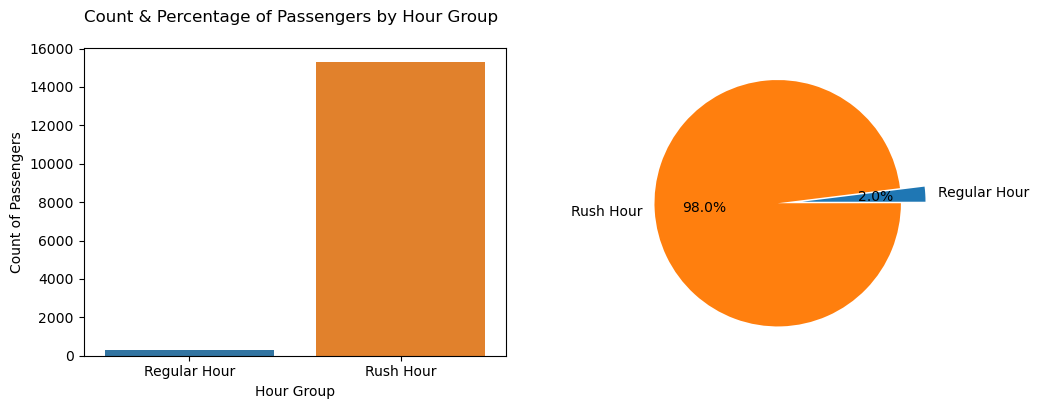

In [1002]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(data=countsbyHourGroup, x='rush_hour',y='passengersCount',palette=plt.cm.tab10.colors)
plt.xlabel('Hour Group')
plt.ylabel('Count of Passengers')
plt.title('Count & Percentage of Passengers by Hour Group\n', loc='left')
plt.subplot(1,2,2)
plt.pie(data=countsbyHourGroup, x='passengersCount',labels='rush_hour',autopct='%.1f%%',
        explode=[0,0.2])
plt.show()

It can be seen from the bar plot that the total number of passengers during rush hours throughout the month **nearly reaches 16,000**, which corresponds to **approximately 98%** of the overall proportion as illustrated in the pie chart. In contrast, the total number of passengers during **regular hours does not exceed 1,000**, accounting for only about **2% of the total**.

### Identifying the Median Travel Duration for Each Trip

#### Within Rush Hours

In [941]:
df_agg = df_filtered[df_filtered['rush_hour']=='Rush Hour'].pivot_table(
    values=['duration','stopsCount'],
    index=['corridorID','tapInStopsName','tapOutStopsName','distance_km'],
    aggfunc={
        'stopsCount': 'median',
        'duration': 'median',
    }
).reset_index().sort_values('duration',ascending=False)
display(df_agg.head(10),df_agg.tail())

,corridorID,tapInStopsName,tapOutStopsName,distance_km,duration,stopsCount
855,M13,Kebayoran Lama,Mayestik,1.518838,0 days 02:56:07,0.0
382,5,Salemba Carolus,Kramat Sentiong,1.123443,0 days 02:55:59,1.0
487,6D,Karet Pedurenan 1,Plaza Sentral,0.779975,0 days 02:55:35,2.0
757,9H,Sbr. H. Samali,YBK,0.618999,0 days 02:50:59,1.0
320,3E,BSI Cengkareng,Taman Palem Lestari,0.904248,0 days 02:49:29,1.0
934,S21,Jln. H. Ahmad,Pondok Indah 2,0.749509,0 days 02:47:30,1.0
18,10D,Cempaka Mas,Permai Koja Arah Utara,5.926642,0 days 02:46:27,4.0
507,6H,Sbr. Goethe Institute,BRI Menteng,0.514886,0 days 02:43:47,2.0
821,M1,Bundaran HI,Blok M,6.038324,0 days 02:43:13,9.0
765,9N,Pinang Ranti,Garuda Taman Mini,0.582165,0 days 02:43:00,0.0


,corridorID,tapInStopsName,tapOutStopsName,distance_km,duration,stopsCount
107,13,Adam Malik,Kebayoran Lama,3.288856,0 days 00:26:41,4.0
748,9E,Sbr. Hotel Mulia,Jelambar,5.352764,0 days 00:26:12,5.0
786,D11,Moch Yusuf Raya 1,Sbr. Pesona Square,0.367346,0 days 00:25:26,0.0
885,M4,Pasar Genjing,Utan Kayu,0.446407,0 days 00:25:24.500000,0.0
758,9H,St. Lenteng Agung 1,Wijaya Kusuma,0.236621,0 days 00:21:49,0.0


##### **Exceptionally Long Median Travel Durations During Rush Hours Across Multiple Corridors**

The longest median travel duration is observed on corridor **M13**, specifically for trips from **Kebayoran Lama** stop to **Mayestik** stop, with a median time of **2 hours and 56 minutes** despite the short approximate distance of only **1.5 km** and no intermediate stops.  

However, this phenomenon is not limited to corridor M13. Several other trips also exhibit similarly long durations. For example, on corridor **5**, the trip from **Salemba Carolus** to **Kramat Sentiong** (distance: 1.12 km, one intermediate stop) records a median duration of **2 hours and 56 minutes**. On corridor **6D**, the trip between **Karet Pedurenan 1** and **Plaza Sentral** (distance: 0.78 km, two intermediate stops) also reaches **2 hours and 56 minutes**. Likewise, on corridor **9H**, the trip from **Sbr. H. Samali** to **YBK** (distance: 0.62 km, one intermediate stop) shows a median duration of nearly **2 hours and 51 minutes**.  

Considering that all these trips involve very short distances (less than 2 km), such prolonged durations are unlikely to reflect actual in-vehicle travel times. Instead, they are more plausibly explained by long waiting times, extreme traffic congestion during rush hours, or other operational inefficiencies. These findings highlight the need for Transjakarta to investigate whether such issues are caused by extended headways on specific corridors, severe traffic conditions during peak periods, or broader systemic factors affecting service reliability.

#### Within Regular Hours

In [942]:

df_agg = df_filtered[df_filtered['rush_hour']=='Regular Hour'].pivot_table(
    values=['duration','stopsCount'],
    index=['corridorID','tapInStopsName','tapOutStopsName'],
    aggfunc={
        'stopsCount': 'median',
        'duration': 'median',
    }
).reset_index().sort_values('duration',ascending=False)
display(df_agg.head(),df_agg.tail())

,corridorID,tapInStopsName,tapOutStopsName,duration,stopsCount
17,1A,Glodok,Sawah Besar Arah Selatan,0 days 02:57:57,2.0
77,6A,Kuningan Timur,Pejaten,0 days 02:56:23,5.0
151,M5,Salemba Carolus,Jembatan Merah,0 days 02:51:00,5.0
57,4B,H. Samali,Masjid Jami Baiturrahman,0 days 02:46:19,19.0
147,M3,Petojo,Bundaran HI,0 days 02:44:17,3.0


,corridorID,tapInStopsName,tapOutStopsName,duration,stopsCount
49,2B,Ps. Cakung 1,Lion Metal 2,0 days 00:31:34,7.0
52,2P,RSPAD 1,Term. Senen,0 days 00:29:59.500000,3.0
95,7,Cawang UKI,Pasar Kramat Jati,0 days 00:24:58,2.0
116,8D,Joglo,Jln. Lapangan Merah,0 days 00:22:32,4.0
163,S11,Warung Mangga 1,Kb. Nanas,0 days 00:21:20,0.0


##### **Exceptionally Long Median Travel Durations During Regular Hours**

Unusually long median travel durations are also observed during **regular (non-rush) hours**. For example, on corridor **1A**, the trip from **Glodok** to **Sawah Besar Arah Selatan** (with 2 intermediate stops) records a median duration of **2 hours and 58 minutes**. Similarly, on corridor **6A**, the trip between **Kuningan Timur** and **Pejaten** (5 intermediate stops) reaches a median of **2 hours and 56 minutes**, while on corridor **M5**, the segment from **Salemba Carolus** to **Jembatan Merah** (5 intermediate stops) shows a median duration of **2 hours and 51 minutes**. Another case is found on corridor **4B**, where the trip from **H. Samali** to **Masjid Jami Baiturrahman** (19 intermediate stops) has a median duration of **2 hours and 46 minutes**.  

Given that these trips occur outside of peak periods, such prolonged durations are unlikely to be fully explained by traffic congestion alone. Instead, they may reflect scheduling irregularities, operational inefficiencies, or other service issues that result in extended travel times even during off-peak hours. These anomalies warrant further investigation, as they can negatively affect passenger experience and perceptions of service reliability.

### **Summary of Exploratory Data Analysis (EDA)**

#### **1. Passenger Demographics**
- Female passengers slightly outnumber males (**52% vs. 48%**).
- Males tend to be older than females.
- Statistical test (**Mann–Whitney U**) confirms that male passengers are significantly older.

#### **2. Age Groups**
- Largest passenger groups: **Young Adults** and **Middle-aged Adults**, likely office workers commuting with Transjakarta.
- Smallest passenger group: **Children**.

#### **3. Travel Time Patterns**
- **Morning peak hours:** 05:00–09:59 (highest between 06:00–06:59).
- **Evening peak hours:** 16:00–21:59 (highest between 17:00–17:59).
- Rush hours account for **~98% of trips**, while regular hours contribute only **~2%**.

#### **4. Travel Durations**
##### **Rush Hours**
- Exceptionally long median travel durations (up to **~3 hours**) recorded for very short trips (< 2 km) across multiple corridors (e.g., **M13, 5, 6D, 9H**).
- Likely due to long waiting times, congestion, or operational inefficiencies.

##### **Regular Hours**
- Similar anomalies observed outside peak periods (e.g., **1A, 6A, M5, 4B**).
- Causes may include scheduling irregularities or broader systemic issues.
- These prolonged durations negatively affect passenger experience and reliability perceptions.

**Overall Insight:**  
- **Passenger usage is heavily concentrated during rush hours.**  
- **Male passengers skew older than females.**  
- **Critical operational issues exist** with travel durations that are unrealistically long relative to distance, both during rush and non-rush hours.  
- These findings highlight the need for Transjakarta to investigate **service reliability and operational efficiency**.

# E. Main Analysis

In this analysis, the objective is to identify corridors that could be considered for additional fleet allocation based on their passenger density.  
To achieve this, we first need to calculate the density, which requires obtaining the number of departures for each corridor.  

The departures data used in this analysis was primarily collected from **Moovit.com**, a popular website and application that Transjakarta passengers frequently used to check bus schedules before Transjakarta launched its own official application.


In [943]:
corridorID = ["5","6C","R1A","11D","12","1Q","5M","9A","4","S22","13","9E","M9","T11","6V","11Q","11","1C","M1","7E","1P","7D","6H","14","JIS3","2","6N","M11","9N","7P","13B","M7","12A","9D","1","M8","B21","M3","8K","M10","10D","B11","8C","M2","12B","5D","7A","7Q","1M","5C","6Q","8E","6M","L13E","12P","1F","13C","4B","7C","2A","8A","1E","M4","9H","13D","5N","6T","5F","2P","S21","M12","1N","6U","10","2B","10K","6A","4F","6B","5B","3","M6","8","3F","S11","6D","1H","4C","M13","8D","4D","7","9C","D21","D11","8M","1B","7F","6","10H","3E","12H","9","1A","1R","2Q","M5"]
departures = [15,120,52,35,103,138,103,52,103,35,103,103,15,32,52,52,146,48,15,17,35,50,103,52,69,146,18,15,35,33,205,15,23,69,205,15,26,15,52,15,35,25,103,15,103,103,80,69,33,146,52,103,69,67,35,52,28,86,35,52,26,35,8,35,21,49,52,27,100,52,15,103,52,146,69,31,52,52,52,35,146,15,205,65,69,35,26,66,15,103,52,128,51,33,49,103,50,56,86,103,31,52,103,83,103,100,15]

df_departures = pd.DataFrame(list(zip(corridorID, departures)),columns=["corridorID", "departures"])
df_departures

,corridorID,departures
0,5,15
1,6C,120
2,R1A,52
3,11D,35
4,12,103
...,...,...
102,9,103
103,1A,83
104,1R,103
105,2Q,100


In [944]:
df_filtered = df_filtered.merge(df_departures, on="corridorID", how="left")
df_filtered.sample(5,random_state=42)


,transID,payCardID,payCardBank,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,dayofWeek,age,age_group,duration,duration_min,stopsCount,distance_km,hour,rush_hour,departures
15572,LOJT892W8N37DQ,4314957027209455,dki,F,1982,9H,Blok M - Universitas Indonesia,1.0,B05463P,St. Lenteng Agung 1,-6.330883,106.83542,39,2023-04-11 09:13:46,B05881P,Wijaya Kusuma,-6.333008,106.83567,40,2023-04-11 09:35:35,3500.0,Tue,41,Middle-aged Adults,0 days 00:21:49,21.816667,0,0.236621,9,Rush Hour,35
12684,VJTD354Z1I70SP,38919000659661,bni,F,1994,11Q,Kampung Melayu - Pulo Gebang via BKT,0.0,P00174,Perumnas Klender,-6.216689,106.93054,3,2023-04-24 19:10:02,B02016P,Komplek Abadi 2,-6.229722,106.90813,15,2023-04-24 21:09:10,3500.0,Mon,29,Young Adults,0 days 01:59:08,119.133333,11,2.868455,19,Rush Hour,52
10333,WRQO400R8S90ZS,374068907744739,emoney,F,1995,6D,Stasiun Tebet - Karet via Underpass,0.0,B02183P,Ambassador,-6.224125,106.82663,16,2023-04-17 07:33:43,B03396P,Kota Kasablanka,-6.224688,106.84246,20,2023-04-17 08:25:40,3500.0,Mon,28,Young Adults,0 days 00:51:57,51.950000,3,1.752974,7,Rush Hour,35
3656,PFUF526N4C98EI,342370004909630,emoney,M,1975,6D,Stasiun Tebet - Karet via Underpass,0.0,B04505P,Sbr. Standard Chartered,-6.217407,106.81934,13,2023-04-19 05:29:48,B03396P,Kota Kasablanka,-6.224688,106.84246,20,2023-04-19 06:03:19,3500.0,Wed,48,Old-aged Adults,0 days 00:33:31,33.516667,6,2.682354,5,Rush Hour,35
9502,COFX764C9Y92NU,2720497305962063,dki,M,2002,6,Ragunan - Dukuh Atas 2,1.0,P00085,Jati Padang,-6.285431,106.82626,14,2023-04-13 09:18:21,P00199,Ragunan,-6.305769,106.81949,17,2023-04-13 10:27:19,3500.0,Thu,21,Young Adults,0 days 01:08:58,68.966667,2,2.370605,9,Rush Hour,86


Now that we have merged the departures data with `df_filtered`, we now proceed to calculate the passenger density for each corridor.  


## Calculating Density for Each Corridor

To calculate the density, we use the following formula:

$$
\text{Density}_{\text{corridor}} = \frac{\text{Number of Passengers}}{\text{Number of Departures}}
$$


In [945]:
df_density=df_filtered.groupby(['corridorID','departures'])['transID'].count().reset_index().rename(columns={'transID':'passengersCount'})
df_density['density'] = df_density['passengersCount'] / df_density['departures']
df_density.sort_values('density',ascending=False)

,corridorID,departures,passengersCount,density
90,M10,15,236,15.733333
93,M13,15,230,15.333333
42,5,15,226,15.066667
56,6N,18,270,15.000000
95,M3,15,177,11.800000
...,...,...,...,...
76,9,103,50,0.485437
25,1N,103,49,0.475728
33,2Q,100,19,0.190000
28,1R,103,17,0.165049


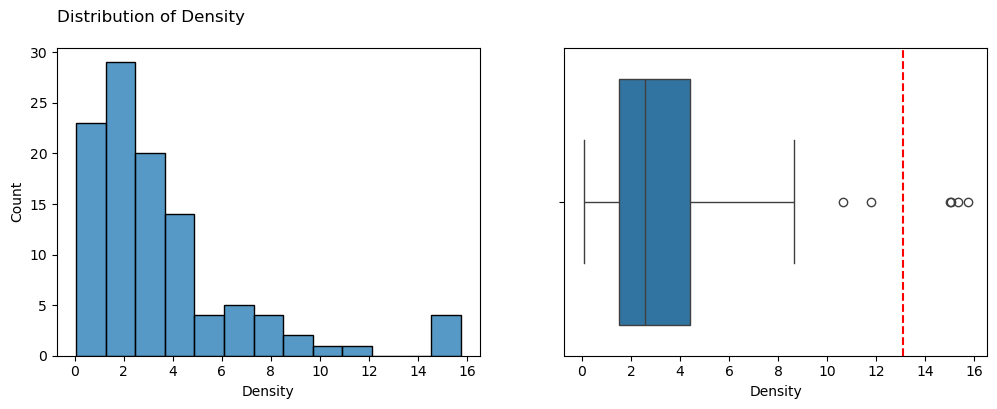

In [1037]:
# extreme values line
extremeRight = df_density['density'].quantile(0.75) + 3*(df_density['density'].quantile(0.75)-df_density['density'].quantile(0.25))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribution of Density\n',loc='left')
sns.histplot(data=df_density, x='density')
plt.xlabel('Density')
plt.subplot(1,2,2)
sns.boxplot(data=df_density, x='density')
plt.xlabel('Density')
plt.axvline(x=extremeRight, linestyle='--', color='red')
plt.show()

From the histogram and box plot above, it is evident that the density distribution is positively skewed. Additionally, there are extreme outliers visible in the box plot (represented by circles to the right of the red line). These extreme outliers correspond to corridors with density values around 15.

Subsequently, a normality test is conducted for the variable `density`.

1. Hypotheses  
$
H_0: \text{Density follows a normal distribution}
$   
$
H_1: \text{Density does not follow a normal distribution}
$

2. Significance Level ($\alpha$)  
$
\alpha = 0.05
$

3. Test Statistic  
Using the **Shapiro-Wilk Test**:  
$
W = 0.780, \quad p\text{-value} = 0.000
$


In [1038]:
stat, p_value = shapiro(df_density['density'])
print("Statistic =", stat, ", p-value =", p_value)

Statistic = 0.779864264653839 , p-value = 2.3013951011480846e-11



4. Rejection Region for $H_0$  
Reject $H_0$ if $p\text{-value} < 0.05$  

5. Decision  
Since $p\text{-value} = 0.000 < 0.05$, we reject $H_0$.  

6. Conclusion  
At a 5% significance level, the variable `density` **does not follow a normal distribution**.  

## Analysis of Corridors with High Density

In [946]:
density_top10 = df_density.sort_values('density',ascending=False).head(10)
density_top10

,corridorID,departures,passengersCount,density
90,M10,15,236,15.733333
93,M13,15,230,15.333333
42,5,15,226,15.066667
56,6N,18,270,15.000000
95,M3,15,177,11.800000
96,M4,8,85,10.625000
101,M9,15,130,8.666667
99,M7,15,129,8.600000
84,B21,26,201,7.730769
91,M11,15,115,7.666667


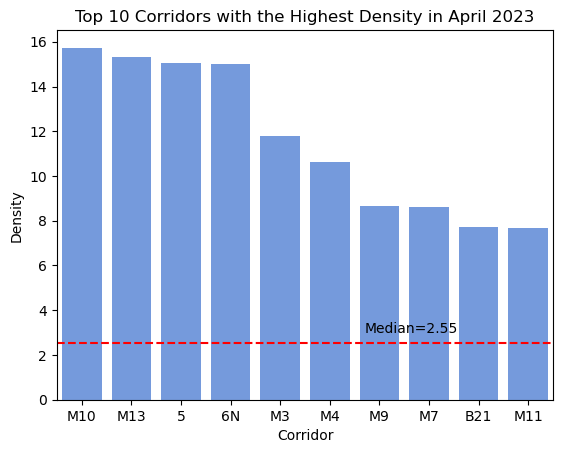

In [948]:
sns.barplot(data=density_top10, x='corridorID',y='density', ci=None,color='cornflowerblue')
plt.title('Top 10 Corridors with the Highest Density in April 2023')
plt.xlabel('Corridor')
plt.ylabel('Density')
plt.axhline(y=df_density['density'].median(),linestyle='--',color='red')
plt.text(x=5.7, y=3, s=f'Median={round(df_density['density'].median(),2)}')
plt.show()

The top 10 corridors with the highest density, as shown in the bar plot, are all above the median density.  
We can see that the highest density is found in **Corridor M10**. Additionally, **M13, 5, and 6N** have density values that are quite similar to M10. These corridors are most likely the ones identified as extreme outliers in the box plot.  

To further investigate, we will use the **Kruskal–Wallis test** to examine whether the daily density across these four corridors is significantly different or not.

In [949]:
df_filtered['day']=df_filtered['tapInTime'].dt.day

In [950]:
countsbyDayStops = df_filtered.groupby(['corridorID','day','departures'])['transID'].count().reset_index().rename(columns={'transID':'passengersCount'})
countsbyDayStops['density'] = countsbyDayStops['passengersCount'] / countsbyDayStops['departures']
countsbyDayStops

,corridorID,day,departures,passengersCount,density
0,1,3,205,12,0.058537
1,1,4,205,12,0.058537
2,1,5,205,8,0.039024
3,1,6,205,11,0.053659
4,1,7,205,12,0.058537
...,...,...,...,...,...
2087,T11,24,32,11,0.343750
2088,T11,25,32,12,0.375000
2089,T11,26,32,12,0.375000
2090,T11,27,32,12,0.375000


1. Hypotheses  
$
H_0: \text{There is no difference in daily passenger density between corridors M10, M13, 5, and 6N.}
$   
$
H_1: \text{At least one corridor has a significantly different daily density.}
$

2. Significance Level ($\alpha$)  
$
\alpha = 0.05
$

3. Test Statistic  
Using the **Kruskal-Wallis Test**:  
$
V = 3.208, \quad p\text{-value} = 0.361
$ 

In [951]:
from scipy.stats import kruskal

# Mann–Whitney U test
kruskal(
    countsbyDayStops[countsbyDayStops['corridorID']=='M10']['density'], 
    countsbyDayStops[countsbyDayStops['corridorID']=='M13']['density'],
    countsbyDayStops[countsbyDayStops['corridorID']=='5']['density'],
    countsbyDayStops[countsbyDayStops['corridorID']=='6N']['density'],
)


KruskalResult(statistic=np.float64(3.2075169738118467), pvalue=np.float64(0.3607233551111397))


4. Rejection Region for $H_0$  
Reject $H_0$ if $p\text{-value} > 0.05$  

5. Decision  
Since $p\text{-value} = 0.361 > 0.05$, we fail to reject $H_0$.  

6. Conclusion  
At the 5% significance level, there is **insufficient evidence** to conclude that daily corridor density differs among corridors M10, M13, 5, and 6N.

#### **Summary of Analysis on Density**

Based on the analysis, we recommend that TransJakarta consider adding fleets to corridors with the highest density, as shown in the bar plot, particularly the top four (M10, M13, 5, and 6N).  

However, if only one corridor needs to be prioritized, a further analysis of passenger demographics should be conducted.

## Tap-in & Tap-out Hotspots of the Four Densest Corridors

`M10 corridor`

In [953]:
corM10 = df_filtered[df_filtered['corridorID']=='M10']
corM10_tapin=corM10.groupby(['tapInStopsName','tapInStopsLat','tapInStopsLon'])['transID'].count().reset_index()\
    .rename(columns={'transID':'tapInCount',"tapInStopsName": "StopsName",'tapInStopsLat':'Latitude','tapInStopsLon':'Longitude'}).sort_values('tapInCount',ascending=False)
corM10 = df_filtered[df_filtered['corridorID']=='M10']
corM10_tapout=corM10.groupby(['tapOutStopsName','tapOutStopsLat','tapOutStopsLon'])['transID'].count().reset_index()\
    .rename(columns={'transID':'tapOutCount',"tapOutStopsName": "StopsName",'tapOutStopsLat':'Latitude','tapOutStopsLon':'Longitude'}).sort_values('tapOutCount',ascending=False)


In [954]:
corM10_merge = pd.merge(
    corM10_tapin,
    corM10_tapout,
    on="StopsName",
    how="outer"
)

# isi NaN dengan 0
corM10_merge = corM10_merge.fillna(0)
corM10_merge[["tapInCount", "tapOutCount"]] = corM10_merge[["tapInCount", "tapOutCount"]].astype(int)
corM10_merge['totalCount'] = corM10_merge['tapInCount'] + corM10_merge['tapOutCount']
corM10_merge

,StopsName,Latitude_x,Longitude_x,tapInCount,Latitude_y,Longitude_y,tapOutCount,totalCount
0,Ahmad Yani Bea Cukai,-6.205526,106.87378,20,0.000000,0.00000,0,20
1,BKN,0.000000,0.00000,0,-6.257751,106.87000,18,18
2,Cawang Soetoyo,0.000000,0.00000,0,-6.244771,106.87598,19,19
3,Cawang UKI,-6.250309,106.87360,38,0.000000,0.00000,0,38
4,Cempaka Mas,-6.165888,106.87920,42,-6.165888,106.87920,24,66
5,Cempaka Putih,-6.174207,106.87642,6,0.000000,0.00000,0,6
6,Cipinang Kebon Nanas,-6.231659,106.87637,18,-6.231659,106.87637,25,43
7,Enggano,-6.110150,106.89242,18,0.000000,0.00000,0,18
8,Kayu Putih Rawasari,0.000000,0.00000,0,-6.187453,106.87542,19,19
9,PGC 2,0.000000,0.00000,0,-6.261900,106.86570,35,35


In [956]:
jakarta_map = folium.Map(location = [-6.192859815701609, 106.82469684629827], zoom_start=12)

In [957]:
for _, row in corM10_merge.iterrows():
    if row['StopsName'] in corM10_tapin['StopsName'].values:
        if row['Latitude_x'] != 0 and row['Longitude_x'] != 0:
            folium.Marker(
                location=[row['Latitude_x'], row['Longitude_x']],
                popup=f"Tap-in Count: {row['tapInCount']}<br>Tap-out Count: {row['tapOutCount']}",
                tooltip=row['StopsName'],
                icon=folium.Icon(color="blue", icon="info-sign")
            ).add_to(jakarta_map)

    elif row['StopsName'] in corM10_tapout['StopsName'].values:
        if row['Latitude_y'] != 0 and row['Longitude_y'] != 0:
            folium.Marker(
                location=[row['Latitude_y'], row['Longitude_y']],
                popup=f"Tap-in Count: {row['tapInCount']}<br>Tap-out Count: {row['tapOutCount']}",
                tooltip=row['StopsName'],
                icon=folium.Icon(color="blue", icon="info-sign")
            ).add_to(jakarta_map)
jakarta_map

In [958]:
heat_data = []

# tambahkan titik dari tap-in
for _, row in corM10_merge.iterrows():
    heat_data.append([row['Latitude_x'], row['Longitude_x'], row['tapInCount']])

# tambahkan titik dari tap-out
for _, row in corM10_merge.iterrows():
    heat_data.append([row['Latitude_y'], row['Longitude_y'], row['tapOutCount']])

m = folium.Map(location=[-6.192859815701609, 106.82469684629827], zoom_start=12)
HeatMap(heat_data, radius=25, blur=15, max_zoom=12).add_to(m)
m


The heatmap shows that the main tap-in and tap-out hotspot is at **Tanjung Priok**, indicated by the deepest red color. **Cempaka Mas follows** with an orange shade, reflecting relatively high activity, though less than Tanjung Priok.

`M13 corridor`

In [961]:
corM13 = df_filtered[df_filtered['corridorID']=='M13']
corM13_tapin=corM13.groupby(['tapInStopsName','tapInStopsLat','tapInStopsLon'])['transID'].count().reset_index()\
    .rename(columns={'transID':'tapInCount',"tapInStopsName": "StopsName",'tapInStopsLat':'Latitude','tapInStopsLon':'Longitude'}).sort_values('tapInCount',ascending=False)
corM13 = df_filtered[df_filtered['corridorID']=='M13']
corM13_tapout=corM13.groupby(['tapOutStopsName','tapOutStopsLat','tapOutStopsLon'])['transID'].count().reset_index()\
    .rename(columns={'transID':'tapOutCount',"tapOutStopsName": "StopsName",'tapOutStopsLat':'Latitude','tapOutStopsLon':'Longitude'}).sort_values('tapOutCount',ascending=False)
corM13_merge = pd.merge(
    corM13_tapin,
    corM13_tapout,
    on="StopsName",
    how="outer"
)

corM13_merge = corM13_merge.fillna(0)
corM13_merge[["tapInCount", "tapOutCount"]] = corM13_merge[["tapInCount", "tapOutCount"]].astype(int)
corM13_merge['totalCount'] = corM13_merge['tapInCount'] + corM13_merge['tapOutCount']

jakarta_map = folium.Map(location = [-6.192859815701609, 106.82469684629827], zoom_start=12)


for _, row in corM13_merge.iterrows():
    if row['StopsName'] in corM13_tapin['StopsName'].values:
        if row['Latitude_x'] != 0 and row['Longitude_x'] != 0:
            folium.Marker(
                location=[row['Latitude_x'], row['Longitude_x']],
                popup=f"Tap-in Count: {row['tapInCount']}<br>Tap-out Count: {row['tapOutCount']}",
                tooltip=row['StopsName'],
                icon=folium.Icon(color="blue", icon="info-sign")
            ).add_to(jakarta_map)

    elif row['StopsName'] in corM13_tapout['StopsName'].values:
        if row['Latitude_y'] != 0 and row['Longitude_y'] != 0:
            folium.Marker(
                location=[row['Latitude_y'], row['Longitude_y']],
                popup=f"Tap-in Count: {row['tapInCount']}<br>Tap-out Count: {row['tapOutCount']}",
                tooltip=row['StopsName'],
                icon=folium.Icon(color="blue", icon="info-sign")
            ).add_to(jakarta_map)

jakarta_map


In [ ]:
heat_data = []

for _, row in corM13_merge.iterrows():
    heat_data.append([row['Latitude_x'], row['Longitude_x'], row['tapInCount']])

for _, row in corM13_merge.iterrows():
    heat_data.append([row['Latitude_y'], row['Longitude_y'], row['tapOutCount']])

m = folium.Map(location=[-6.192859815701609, 106.82469684629827], zoom_start=12)
HeatMap(heat_data, radius=25, blur=15, max_zoom=12).add_to(m)
m

The heatmap shows that the main tap-in and tap-out hotspot is at **Adam Malik**, indicated by the deepest red color. **Seskoal** follows with an slightly lighter red shade, reflecting relatively high activity, though less than **Adam Malik**.

`Corridor 5`

In [964]:
cor5 = df_filtered[df_filtered['corridorID']=='5']
cor5_tapin=cor5.groupby(['tapInStopsName','tapInStopsLat','tapInStopsLon'])['transID'].count().reset_index()\
    .rename(columns={'transID':'tapInCount',"tapInStopsName": "StopsName",'tapInStopsLat':'Latitude','tapInStopsLon':'Longitude'}).sort_values('tapInCount',ascending=False)
cor5_tapout=cor5.groupby(['tapOutStopsName','tapOutStopsLat','tapOutStopsLon'])['transID'].count().reset_index()\
    .rename(columns={'transID':'tapOutCount',"tapOutStopsName": "StopsName",'tapOutStopsLat':'Latitude','tapOutStopsLon':'Longitude'}).sort_values('tapOutCount',ascending=False)
cor5_merge = pd.merge(
    cor5_tapin,
    cor5_tapout,
    on="StopsName",
    how="outer"
)

cor5_merge = cor5_merge.fillna(0)
cor5_merge[["tapInCount", "tapOutCount"]] = cor5_merge[["tapInCount", "tapOutCount"]].astype(int)
cor5_merge['totalCount'] = cor5_merge['tapInCount'] + cor5_merge['tapOutCount']

jakarta_map = folium.Map(location = [-6.192859815701609, 106.82469684629827], zoom_start=12)


for _, row in cor5_merge.iterrows():
    if row['StopsName'] in cor5_tapin['StopsName'].values:
        if row['Latitude_x'] != 0 and row['Longitude_x'] != 0:
            folium.Marker(
                location=[row['Latitude_x'], row['Longitude_x']],
                popup=f"Tap-in Count: {row['tapInCount']}<br>Tap-out Count: {row['tapOutCount']}",
                tooltip=row['StopsName'],
                icon=folium.Icon(color="blue", icon="info-sign")
            ).add_to(jakarta_map)

    elif row['StopsName'] in cor5_tapout['StopsName'].values:
        if row['Latitude_y'] != 0 and row['Longitude_y'] != 0:
            folium.Marker(
                location=[row['Latitude_y'], row['Longitude_y']],
                popup=f"Tap-in Count: {row['tapInCount']}<br>Tap-out Count: {row['tapOutCount']}",
                tooltip=row['StopsName'],
                icon=folium.Icon(color="blue", icon="info-sign")
            ).add_to(jakarta_map)

jakarta_map


In [965]:
heat_data = []

for _, row in cor5_merge.iterrows():
    heat_data.append([row['Latitude_x'], row['Longitude_x'], row['tapInCount']])

for _, row in cor5_merge.iterrows():
    heat_data.append([row['Latitude_y'], row['Longitude_y'], row['tapOutCount']])

m = folium.Map(location=[-6.192859815701609, 106.82469684629827], zoom_start=12)
HeatMap(heat_data, radius=25, blur=15, max_zoom=12).add_to(m)
m

The heatmap shows that the main tap-in and tap-out hotspots is at **Budi Utomo**, indicated by the deepest red color. **Pal Putih** follows with an slightly lighter red shade, reflecting relatively high activity, though less than **Adam Malik**.

`Corridor 6N`

In [967]:
cor6N = df_filtered[df_filtered['corridorID']=='6N']
cor6N_tapin=cor6N.groupby(['tapInStopsName','tapInStopsLat','tapInStopsLon'])['transID'].count().reset_index()\
    .rename(columns={'transID':'tapInCount',"tapInStopsName": "StopsName",'tapInStopsLat':'Latitude','tapInStopsLon':'Longitude'}).sort_values('tapInCount',ascending=False)
cor6N_tapout=cor6N.groupby(['tapOutStopsName','tapOutStopsLat','tapOutStopsLon'])['transID'].count().reset_index()\
    .rename(columns={'transID':'tapOutCount',"tapOutStopsName": "StopsName",'tapOutStopsLat':'Latitude','tapOutStopsLon':'Longitude'}).sort_values('tapOutCount',ascending=False)
cor6N_merge = pd.merge(
    cor6N_tapin,
    cor6N_tapout,
    on="StopsName",
    how="outer"
)

cor6N_merge = cor6N_merge.fillna(0)
cor6N_merge[["tapInCount", "tapOutCount"]] = cor6N_merge[["tapInCount", "tapOutCount"]].astype(int)
cor6N_merge['totalCount'] = cor6N_merge['tapInCount'] + cor6N_merge['tapOutCount']

jakarta_map = folium.Map(location = [-6.192859815701609, 106.82469684629827], zoom_start=12)


for _, row in cor6N_merge.iterrows():
    if row['StopsName'] in cor6N_tapin['StopsName'].values:
        if row['Latitude_x'] != 0 and row['Longitude_x'] != 0:
            folium.Marker(
                location=[row['Latitude_x'], row['Longitude_x']],
                popup=f"Tap-in Count: {row['tapInCount']}<br>Tap-out Count: {row['tapOutCount']}",
                tooltip=row['StopsName'],
                icon=folium.Icon(color="blue", icon="info-sign")
            ).add_to(jakarta_map)

    elif row['StopsName'] in cor6N_tapout['StopsName'].values:
        if row['Latitude_y'] != 0 and row['Longitude_y'] != 0:
            folium.Marker(
                location=[row['Latitude_y'], row['Longitude_y']],
                popup=f"Tap-in Count: {row['tapInCount']}<br>Tap-out Count: {row['tapOutCount']}",
                tooltip=row['StopsName'],
                icon=folium.Icon(color="blue", icon="info-sign")
            ).add_to(jakarta_map)

jakarta_map


In [968]:
heat_data = []

for _, row in cor6N_merge.iterrows():
    heat_data.append([row['Latitude_x'], row['Longitude_x'], row['tapInCount']])

for _, row in cor6N_merge.iterrows():
    heat_data.append([row['Latitude_y'], row['Longitude_y'], row['tapOutCount']])

m = folium.Map(location=[-6.192859815701609, 106.82469684629827], zoom_start=12)
HeatMap(heat_data, radius=25, blur=15, max_zoom=12).add_to(m)
m

The heatmap shows that the main tap-in and tap-out hotspots is at **RSIA Kemang**, indicated by the deepest red color.

## Passengers Distribution by Hour

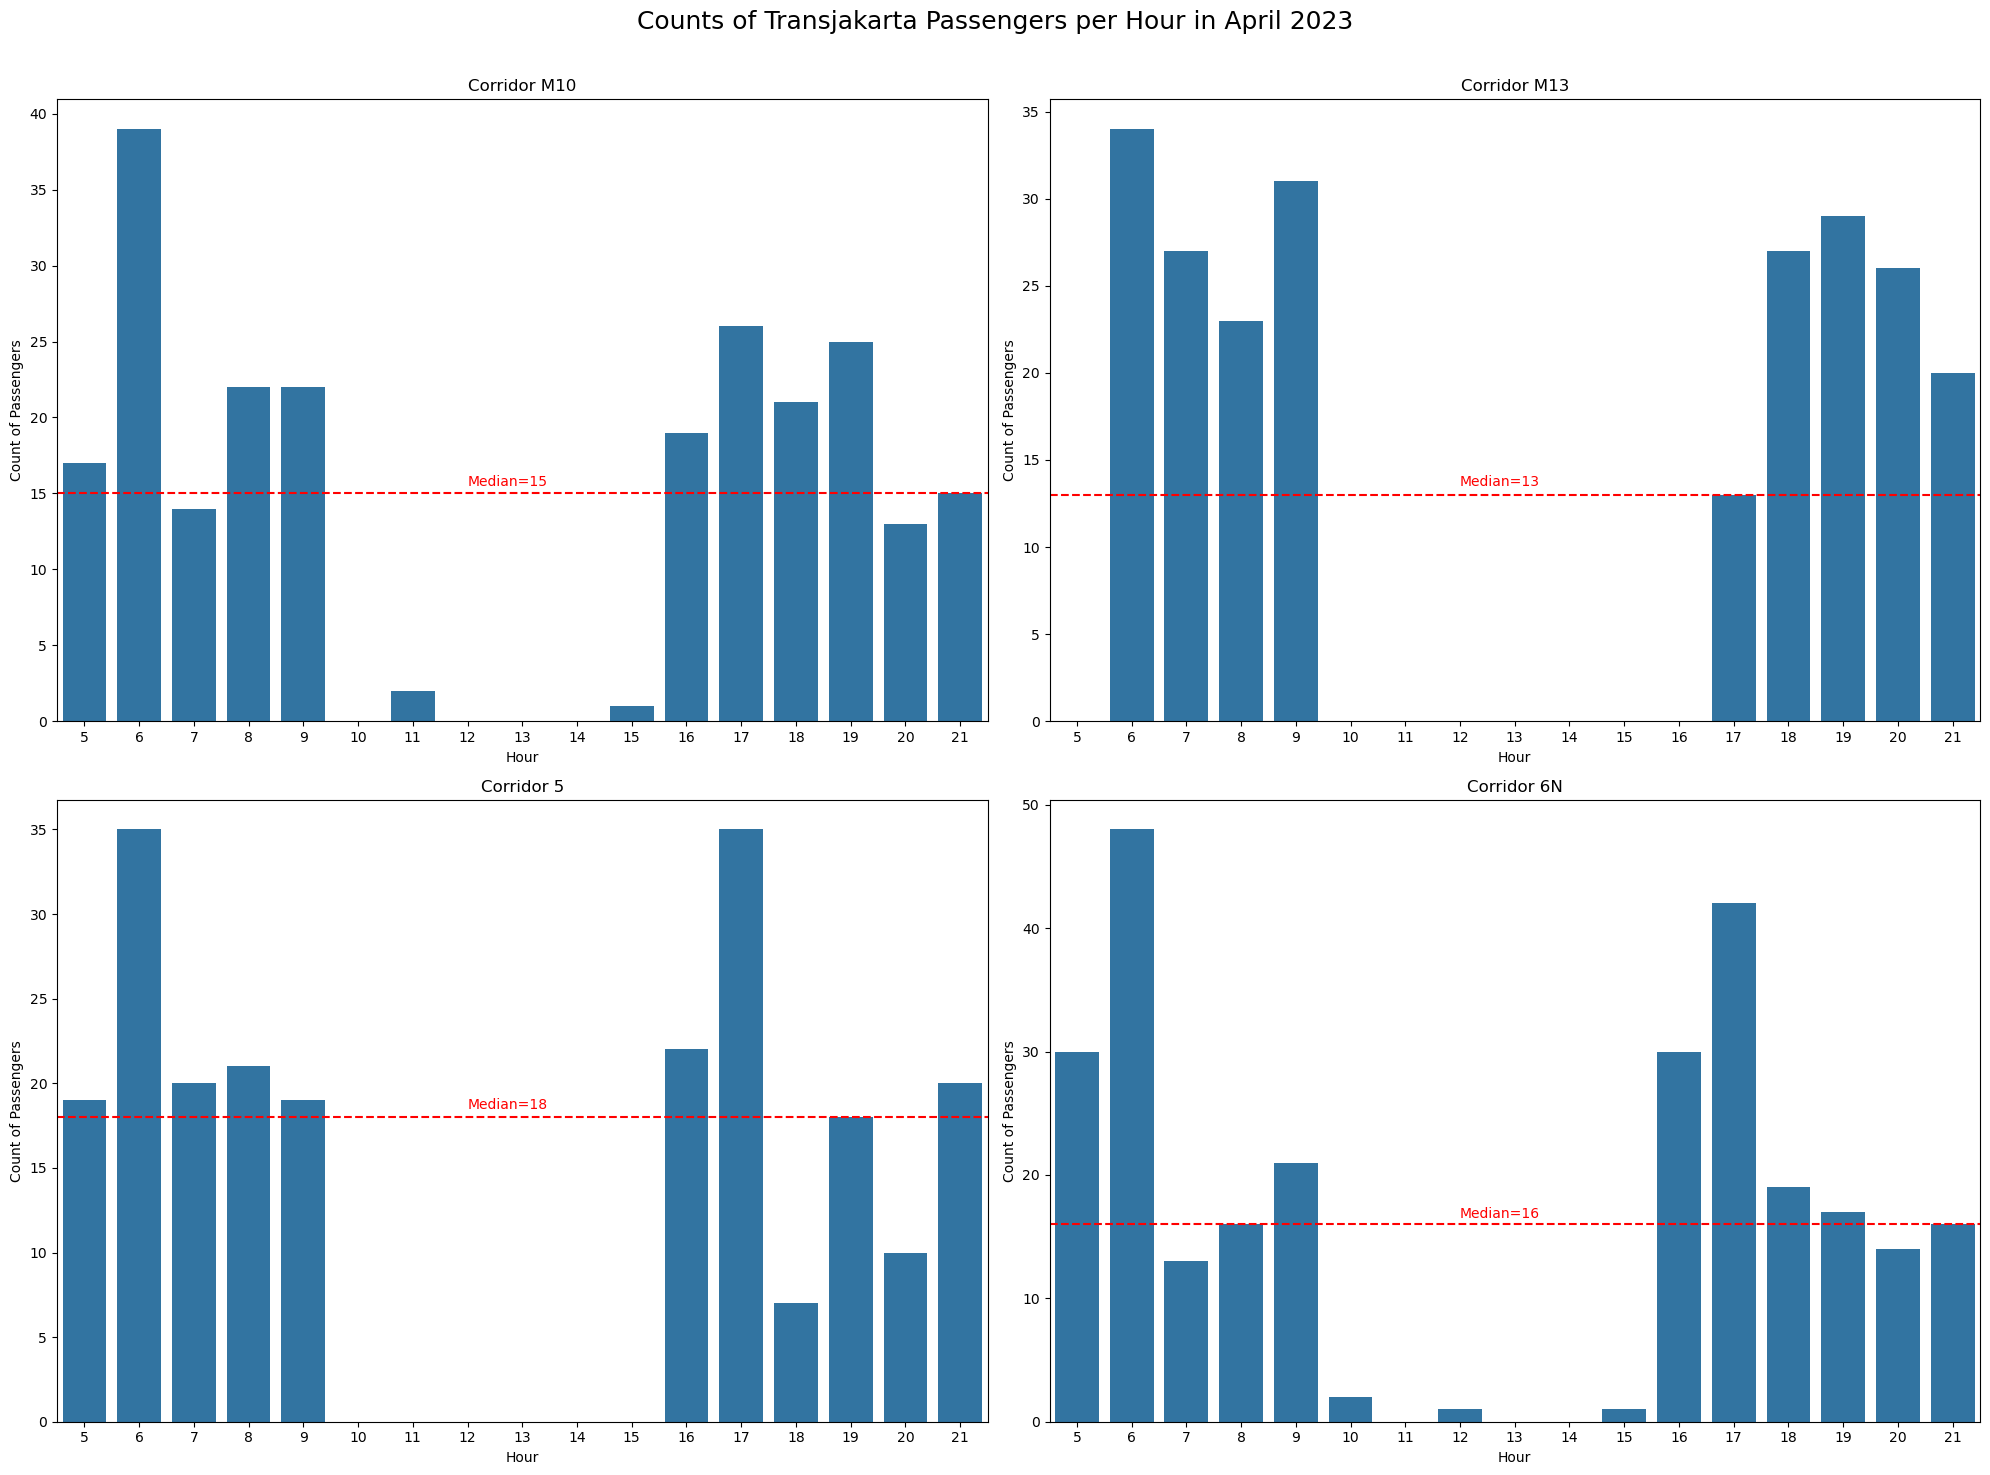

In [1056]:
# Corridor M10
corM10_agg=corM10.groupby(['hour'])['transID'].count().reset_index().rename(columns={'transID':'passengersCount'})
corM10_agg.hour.unique()
corM10_agg.loc[len(corM10_agg)] = [10, 0]
corM10_agg.loc[len(corM10_agg)] = [12, 0]
corM10_agg.loc[len(corM10_agg)] = [13, 0]
corM10_agg.loc[len(corM10_agg)] = [14, 0]
corM10_agg = corM10_agg.sort_values('hour')

# Corridor M13
corM13_agg=corM13.groupby(['hour'])['transID'].count().reset_index().rename(columns={'transID':'passengersCount'})
corM13_agg.hour.unique()
corM13_agg.loc[len(corM13_agg)] = [5, 0]
corM13_agg.loc[len(corM13_agg)] = [10, 0]
corM13_agg.loc[len(corM13_agg)] = [11, 0]
corM13_agg.loc[len(corM13_agg)] = [12, 0]
corM13_agg.loc[len(corM13_agg)] = [13, 0]
corM13_agg.loc[len(corM13_agg)] = [14, 0]
corM13_agg.loc[len(corM13_agg)] = [15, 0]
corM13_agg.loc[len(corM13_agg)] = [16, 0]
corM13_agg = corM13_agg.sort_values('hour')

# Corridor 5
cor5_agg=cor5.groupby(['hour'])['transID'].count().reset_index().rename(columns={'transID':'passengersCount'})
cor5_agg.hour.unique()
cor5_agg.loc[len(cor5_agg)] = [10, 0]
cor5_agg.loc[len(cor5_agg)] = [11, 0]
cor5_agg.loc[len(cor5_agg)] = [12, 0]
cor5_agg.loc[len(cor5_agg)] = [13, 0]
cor5_agg.loc[len(cor5_agg)] = [14, 0]
cor5_agg.loc[len(cor5_agg)] = [15, 0]
cor5_agg = cor5_agg.sort_values('hour')

# Corridor 6N
cor6N_agg=cor6N.groupby(['hour'])['transID'].count().reset_index().rename(columns={'transID':'passengersCount'})
cor6N_agg.hour.unique()
cor6N_agg.loc[len(cor6N_agg)] = [11, 0]
cor6N_agg.loc[len(cor6N_agg)] = [13, 0]
cor6N_agg.loc[len(cor6N_agg)] = [14, 0]
cor6N_agg = cor6N_agg.sort_values('hour')

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Counts of Transjakarta Passengers per Hour in April 2023', fontsize=18)

# Corridor M10
sns.barplot(data=corM10_agg, x='hour', y='passengersCount', ci=None, ax=axes[0,0])
axes[0,0].set_title('Corridor M10')
axes[0,0].set_xlabel('Hour')
axes[0,0].set_ylabel('Count of Passengers')
median_m10 = corM10_agg['passengersCount'].median()
axes[0,0].axhline(y=median_m10, linestyle='--', color='red')
axes[0,0].text(x=7, 
               y=median_m10+0.5, 
               s=f'Median={median_m10:.0f}',
               color='red')

# Corridor M13
sns.barplot(data=corM13_agg, x='hour', y='passengersCount', ci=None, ax=axes[0,1])
axes[0,1].set_title('Corridor M13')
axes[0,1].set_xlabel('Hour')
axes[0,1].set_ylabel('Count of Passengers')
median_m13 = corM13_agg['passengersCount'].median()
axes[0,1].axhline(y=median_m13, linestyle='--', color='red')
axes[0,1].text(x=7, 
               y=median_m13+0.5, 
               s=f'Median={median_m13:.0f}',
               color='red')

# Corridor 5
sns.barplot(data=cor5_agg, x='hour', y='passengersCount', ci=None, ax=axes[1,0])
axes[1,0].set_title('Corridor 5')
axes[1,0].set_xlabel('Hour')
axes[1,0].set_ylabel('Count of Passengers')
median_5 = cor5_agg['passengersCount'].median()
axes[1,0].axhline(y=median_5, linestyle='--', color='red')
axes[1,0].text(x=7, 
               y=median_5+0.5, 
               s=f'Median={median_5:.0f}',
               color='red')

# Corridor 6N
sns.barplot(data=cor6N_agg, x='hour', y='passengersCount', ci=None, ax=axes[1,1])
axes[1,1].set_title('Corridor 6N')
axes[1,1].set_xlabel('Hour')
axes[1,1].set_ylabel('Count of Passengers')
median_6n = cor6N_agg['passengersCount'].median()
axes[1,1].axhline(y=median_6n, linestyle='--', color='red')
axes[1,1].text(x=7, 
               y=median_6n +0.5, 
               s=f'Median={median_6n:.0f}',
               color='red')

plt.tight_layout(rect=[0, 0, 1, 0.97])  # biar suptitle ga ketimpa
plt.show()


The number of passengers riding the four densent corridors are all heavily concentrated in rush hours.

## Gender Perspective in Prioritizing Corridors

Based on the density analysis, four corridors (**M10, M13, 5, and 6N**) were identified as extreme outliers with similarly high passenger densities. The Kruskal-Wallis test further confirmed that there is no significant difference in daily density across these corridors, meaning all of them are equally overcrowded.  

Since overcrowding alone cannot determine which corridor should be prioritized for additional buses, we further examined passenger demographics by another aspect, which is **gender**.  

Prior studies have consistently highlighted that women rely more heavily on public transportation compared to men. Women often prefer buses and other flexible transport modes rather than private vehicles (Wei-Shiuen & Ashley, 2018; Bray & Holyoak, 2015). Similarly, in our case, during April 2023, most Transjakarta passengers were also women (**52%**).  

However, public transport in many developing cities, including Jakarta, is frequently perceived as unsafe. In fact, nearly **90% of women** in Jakarta rated public transport safety as *“bad” or “very poor”*, compared to only **35% of men** (Turner, 2013). Research also shows that **overcrowding is strongly associated with safety issues**, such as sexual harassment on buses and trains (Herrera, 2007).  

Source: [(Shamsul Harumain et al., 2024](https://scholarhub.ui.ac.id/cgi/viewcontent.cgi?article=1143&context=jsgs)


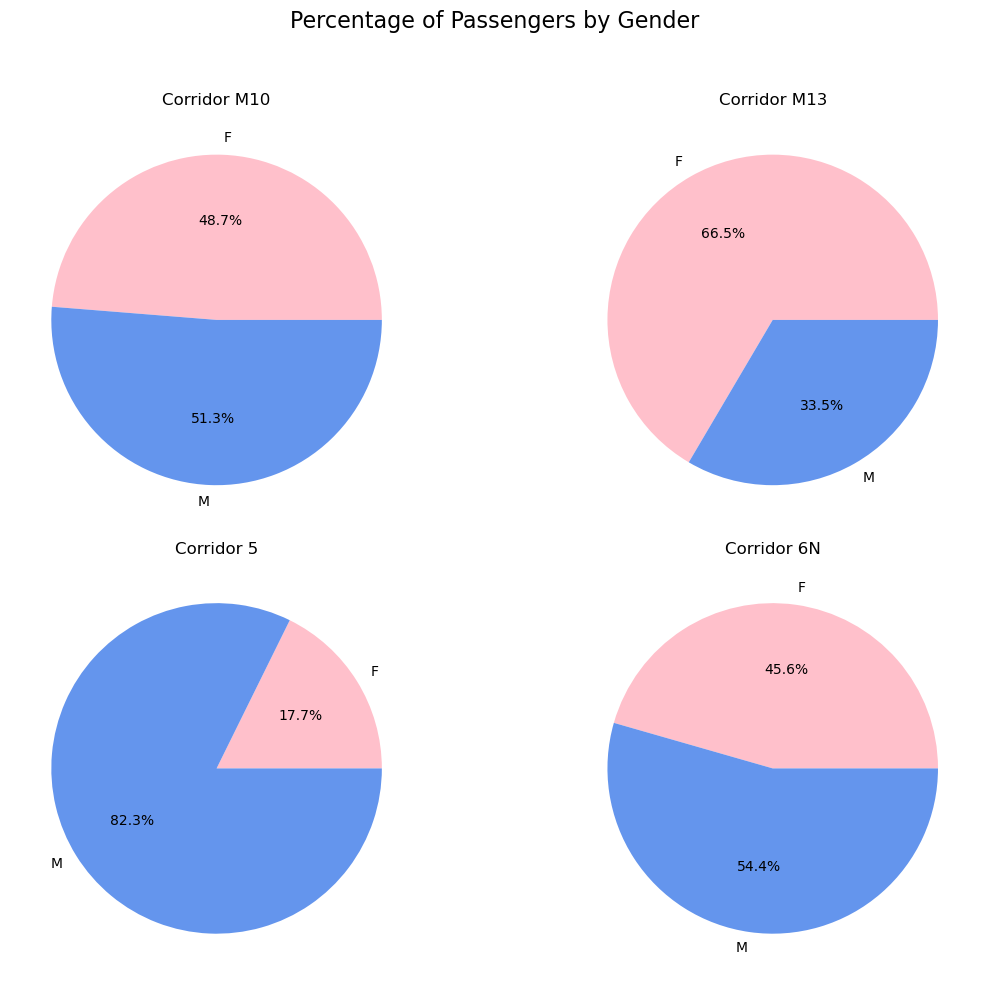

In [1069]:
countsbyGenderM10 = corM10.groupby('payCardSex')['transID'].count().reset_index().rename(columns={'transID':'passengersCount','payCardSex':'Gender'})
countsbyGenderM13 = corM13.groupby('payCardSex')['transID'].count().reset_index().rename(columns={'transID':'passengersCount','payCardSex':'Gender'})
countsbyGender5 = cor5.groupby('payCardSex')['transID'].count().reset_index().rename(columns={'transID':'passengersCount','payCardSex':'Gender'})
countsbyGender6N = cor6N.groupby('payCardSex')['transID'].count().reset_index().rename(columns={'transID':'passengersCount','payCardSex':'Gender'})

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # bikin 2x2 subplot

# Judul besar
fig.suptitle('Percentage of Passengers by Gender', fontsize=16)


# Pie Chart Corridor M10
axes[0,0].pie(
    countsbyGenderM10['passengersCount'],
    labels=countsbyGenderM10['Gender'],
    autopct='%.1f%%',
    colors=['pink','cornflowerblue']
)
axes[0,0].set_title("Corridor M10")

# Pie Chart Corridor M13
axes[0,1].pie(
    countsbyGenderM13['passengersCount'],
    labels=countsbyGenderM13['Gender'],
    autopct='%.1f%%',
    colors=['pink','cornflowerblue']
)
axes[0,1].set_title("Corridor M13")

# Pie Chart Corridor 5
axes[1,0].pie(
    countsbyGender5['passengersCount'],
    labels=countsbyGender5['Gender'],
    autopct='%.1f%%',
    colors=['pink','cornflowerblue']
)
axes[1,0].set_title("Corridor 5")

# Pie Chart Corridor 6N
axes[1,1].pie(
    countsbyGender6N['passengersCount'],
    labels=countsbyGender6N['Gender'],
    autopct='%.1f%%',
    colors=['pink','cornflowerblue']
)
axes[1,1].set_title("Corridor 6N")

plt.tight_layout(rect=[0,0,1,0.95])  # biar tidak tabrakan sama judul
plt.show()


The results show that **Corridor M13 has the highest proportion of female passengers** compared to the other three.  

Given these considerations, we recommend that **Corridor M13 should be prioritized for additional bus fleets**. By doing so, Transjakarta can reduce overcrowding while simultaneously addressing safety and comfort concerns for women, who represent a significant share of its ridership and are disproportionately vulnerable to unsafe conditions.

---

# F. **Conclusion**

- Four busiest corridors were identified: **M10, M13, 5, and 6N**.  
- The Kruskal-Wallis test on daily density failed to reject the null hypothesis, meaning there is not enough evidence to conclude significant differences among these four corridors. In other words, they are all equally **overcrowded**.  
- To determine which corridor should be prioritized, we incorporated another perspective: **gender**. Prior studies highlight that women rely more on public transport and are more vulnerable to overcrowding due to safety and comfort concerns.  
- Our analysis shows that **Corridor M13** has the highest proportion of women compared to the other three corridors.  

**Limitations & Future Work:**  
- This analysis is based only on data from **April 2023**, so results may vary in other months or longer time periods.  
- Future research could also consider other vulnerable groups such as **children and elderly passengers**, who may face additional challenges in overcrowded buses.  
- Overcrowding should not only be seen as a capacity issue, but also as a concern for **safety, comfort, and willingness to use Transjakarta**.  

---

# G. **Recommendations for Transjakarta**

- **Prioritize Corridor M13 (Puri Beta 2 - Tendean)**, especially during **rush hours**, for additional bus allocation, given both the overcrowding and the higher proportion of women passengers.  
- Consider **adjusting schedules** to reduce headways during peak times, not just adding more buses.  
- Implement **continuous monitoring** of passenger density, as demand patterns may change over time.  
- Integrate **gender-sensitive transport planning**, ensuring women’s safety and comfort are explicitly addressed in operational policies.


---

### Future research or consideration 

Transjakarta could also take into account vulnerable groups such as children and elderly passengers, who may face additional challenges in overcrowded buses.

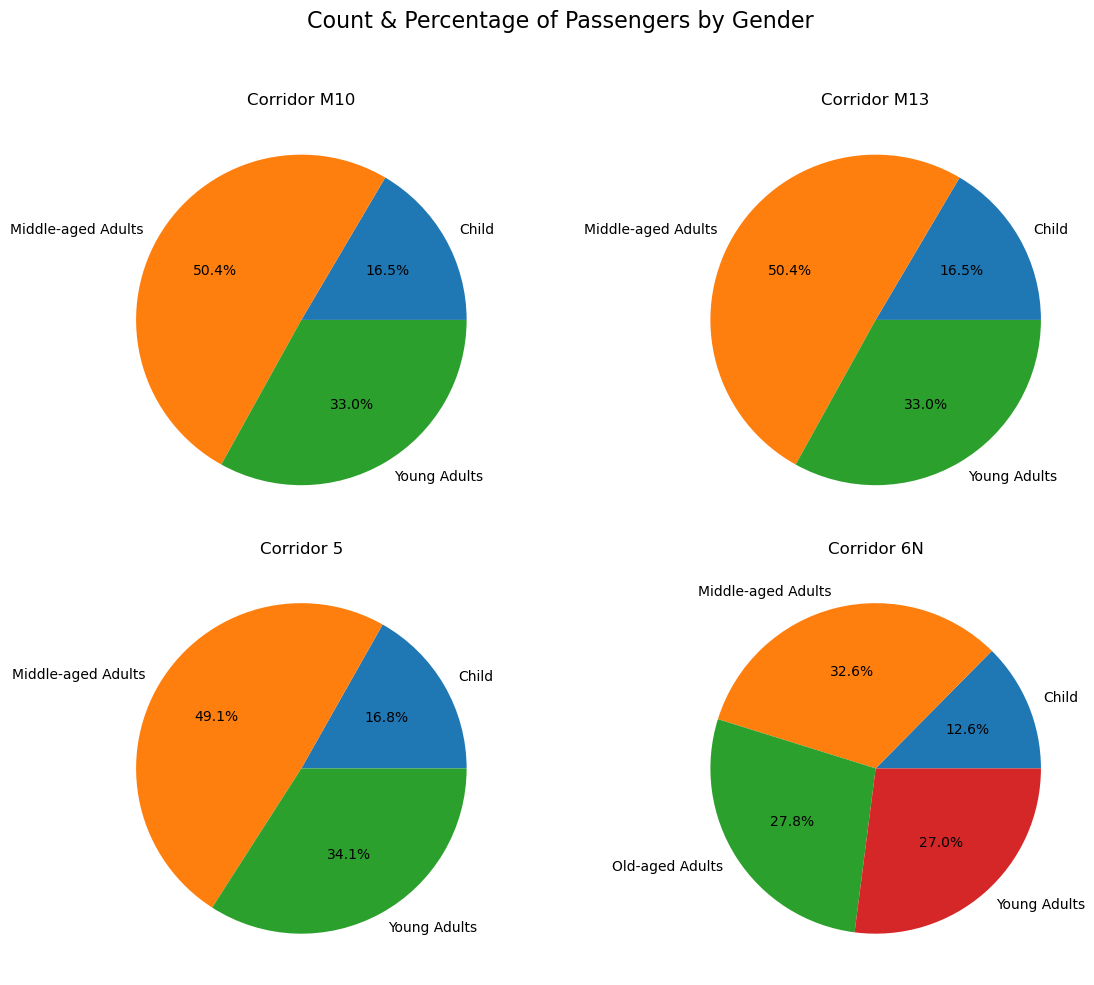

In [972]:
countsbyAgeM10 = corM13.groupby('age_group')['transID'].count().reset_index().rename(columns={'transID':'passengersCount'})
countsbyAgeM13 = corM13.groupby('age_group')['transID'].count().reset_index().rename(columns={'transID':'passengersCount'})
countsbyAge5 = cor5.groupby('age_group')['transID'].count().reset_index().rename(columns={'transID':'passengersCount'})
countsbyAge6N = cor6N.groupby('age_group')['transID'].count().reset_index().rename(columns={'transID':'passengersCount'})

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # bikin 2x2 subplot

# Judul besar
fig.suptitle('Count & Percentage of Passengers by Gender', fontsize=16)


# Pie Chart Corridor M10
axes[0,0].pie(
    countsbyAgeM10['passengersCount'],
    labels=countsbyAgeM10['age_group'],
    autopct='%.1f%%',
)
axes[0,0].set_title("Corridor M10")

# Pie Chart Corridor M13
axes[0,1].pie(
    countsbyAgeM13['passengersCount'],
    labels=countsbyAgeM13['age_group'],
    autopct='%.1f%%',
)
axes[0,1].set_title("Corridor M13")

# Pie Chart Corridor 5
axes[1,0].pie(
    countsbyAge5['passengersCount'],
    labels=countsbyAge5['age_group'],
    autopct='%.1f%%',
)
axes[1,0].set_title("Corridor 5")

# Pie Chart Corridor 6N
axes[1,1].pie(
    countsbyAge6N['passengersCount'],
    labels=countsbyAge6N['age_group'],
    autopct='%.1f%%',
)
axes[1,1].set_title("Corridor 6N")

plt.tight_layout(rect=[0,0,1,0.95])  # biar tidak tabrakan sama judul
plt.show()


In [979]:
# pilih hanya corridorID tertentu
df_selected = df_filtered[df_filtered["corridorID"].isin(["M13", "M10", "5", "6N"])]
df_selected['corridorID'].unique()

array(['5', '6N', 'M10', 'M13'], dtype=object)

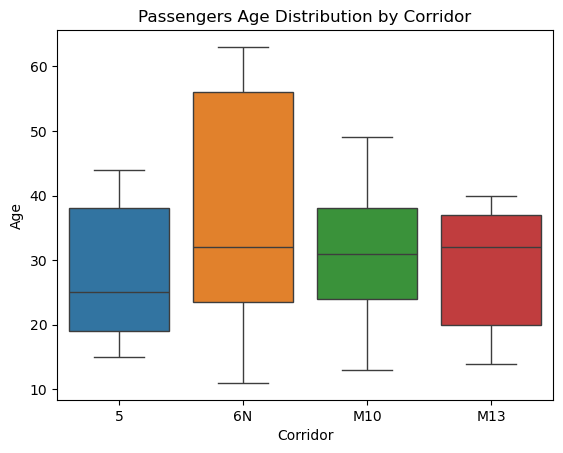

In [1064]:
sns.boxplot(data=df_selected,x='corridorID',y='age',hue='corridorID')
plt.xlabel('Corridor')
plt.ylabel('Age')
plt.title('Passengers Age Distribution by Corridor')
plt.show()

---

### Data for Tableau

In [973]:
df_filtered.to_csv('transjakarta_cleaned.csv',index=False)

In [974]:
df_density.to_csv('corridor_density.csv',index=False)

In [980]:
df_selected.to_csv('selected_corridors.csv',index=False)

In [975]:
corM10_merge['corridorID'] = 'M10'
corM13_merge['corridorID'] = 'M13'
cor5_merge['corridorID'] = '5'
cor6N_merge['corridorID'] = '6N'

In [ ]:
# gabung semua dataframe jadi satu
all_corridors = pd.concat([corM10_merge, corM13_merge, cor5_merge, cor6N_merge], ignore_index=True)

In [977]:
all_corridors[all_corridors['corridorID']=='M10']

,StopsName,tapInCount,tapOutCount,totalCount,corridorID,Latitude,Longitude
0,Ahmad Yani Bea Cukai,20,0,20,M10,-6.205526,106.87378
1,BKN,0,18,18,M10,-6.257751,106.87000
2,Cawang Soetoyo,0,19,19,M10,-6.244771,106.87598
3,Cawang UKI,38,0,38,M10,-6.250309,106.87360
4,Cempaka Mas,42,24,66,M10,-12.331776,213.75840
5,Cempaka Putih,6,0,6,M10,-6.174207,106.87642
6,Cipinang Kebon Nanas,18,25,43,M10,-12.463318,213.75274
7,Enggano,18,0,18,M10,-6.110150,106.89242
8,Kayu Putih Rawasari,0,19,19,M10,-6.187453,106.87542
9,PGC 2,0,35,35,M10,-6.261900,106.86570


In [993]:
all_corridors

,StopsName,Latitude_x,Longitude_x,tapInCount,Latitude_y,Longitude_y,tapOutCount,totalCount,corridorID
0,Ahmad Yani Bea Cukai,-6.205526,106.87378,20,0.000000,0.00000,0,20,M10
1,BKN,0.000000,0.00000,0,-6.257751,106.87000,18,18,M10
2,Cawang Soetoyo,0.000000,0.00000,0,-6.244771,106.87598,19,19,M10
3,Cawang UKI,-6.250309,106.87360,38,0.000000,0.00000,0,38,M10
4,Cempaka Mas,-6.165888,106.87920,42,-6.165888,106.87920,24,66,M10
...,...,...,...,...,...,...,...,...,...
64,Sekolah Sumbangsih,-6.290013,106.81770,19,0.000000,0.00000,0,19,6N
65,Simpang Dharmawangsa VIII,-6.253614,106.80792,15,0.000000,0.00000,0,15,6N
66,Simpang Kemang Selatan 1,0.000000,0.00000,0,-6.274242,106.82066,5,5,6N
67,Simpang Kemang Selatan 2,-6.274106,106.82045,15,0.000000,0.00000,0,15,6N


In [996]:
all_corridors["Latitude"] = np.where(
    (all_corridors["Latitude_x"] == 0) & (all_corridors["Longitude_x"] == 0),
    all_corridors["Latitude_y"],
    all_corridors["Latitude_x"]
)

all_corridors["Longitude"] = np.where(
    (all_corridors["Latitude_x"] == 0) & (all_corridors["Longitude_x"] == 0),
    all_corridors["Longitude_y"],
    all_corridors["Longitude_x"]
)

In [1067]:
all_corridors.sort_values('Latitude',ascending=False)

,StopsName,tapInCount,tapOutCount,totalCount,corridorID,Latitude,Longitude
16,Tanjung Priok,18,56,74,M10,-6.109590,106.88214
7,Enggano,18,0,18,M10,-6.110150,106.89242
13,Permai Koja Arah Utara,0,20,20,M10,-6.114130,106.89309
12,Permai Koja Arah Selatan,19,0,19,M10,-6.114359,106.89314
29,Ancol,1,39,40,5,-6.127563,106.83039
...,...,...,...,...,...,...,...
44,Ampera 3,19,0,19,6N,-6.291196,106.81706
45,Ampera 4,0,19,19,6N,-6.291345,106.81720
43,Ampera 1,0,19,19,6N,-6.292069,106.81774
54,Kementerian Pertanian,0,15,15,6N,-6.297050,106.82127


In [999]:
all_corridors = all_corridors.drop(['Latitude_x','Longitude_x','Latitude_y','Longitude_y'], axis=1)

In [1068]:
all_corridors.to_csv('densest_corridors.csv',index=False)